# Alex Oesterling

### Parameter Tuning for Citation Context investigation

In [1]:
import sys
sys.path.insert(1, '../../Models')
sys.path.insert(1, "../../Utilties")

from basic_bilstm import citationLSTM, train_network, evaluate_network
from metrics import *
import pandas as pd
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

Import the data. I generated preprocessed pkl files. See the embeddings python notebook in the Utilities folder.

In [2]:
pickle = "../../Data/padded_glove.pkl"
train_name = "../../Data/train.csv"
val_name = "../../Data/val.csv"

train = pd.read_csv(train_name)
val = pd.read_csv(val_name)
embedding = pd.read_pickle(pickle)

Generate dataframes from filtering using train and val splits. Thank god for Unique IDs!

In [3]:
trainindices = train["unique_id"].values
out = embedding['unique_id'].isin(trainindices)
print(embedding.keys())
train["embedding"] = embedding[out]["padded_glovezeros"].values

valindices = val["unique_id"].values
out = embedding['unique_id'].isin(valindices)
val["embedding"] = embedding[out]["padded_glovezeros"].values

Index(['unique_id', 'padded_glovezeros'], dtype='object')


Sample list of hyperparameters for iterative testing. For now, I only created one sample dictionary. 

In [4]:
hyperparams = []
def length(array):
    return array.shape[1]
inputsize = max(list(map(length, train["embedding"].values)))
print(inputsize)
arguments = {"input_size": inputsize,
             "hidden_dim": 64,
             "layers": 3,
             "multi_output_size": 6,
             "bi_output_size": 2,
             "embedding": "embedding",
             "lr": 0.001,
             "epochs": 300,
             "batch_size": 64,
             "weigh_loss": True}
hyperparams.append(arguments)
arguments = {"input_size": inputsize,
             "hidden_dim": 64,
             "layers": 2,
             "multi_output_size": 6,
             "bi_output_size": 2,
             "embedding": "embedding",
             "lr": 0.001,
             "epochs": 300,
             "batch_size": 64,
             "weigh_loss": True}
hyperparams.append(arguments)
arguments = {"input_size": inputsize,
             "hidden_dim": 64,
             "layers": 1,
             "multi_output_size": 6,
             "bi_output_size": 2,
             "embedding": "embedding",
             "lr": 0.001,
             "epochs": 300,
             "batch_size": 64,
             "weigh_loss": True}
hyperparams.append(arguments)
arguments = {"input_size": inputsize,
             "hidden_dim": 128,
             "layers": 3,
             "multi_output_size": 6,
             "bi_output_size": 2,
             "embedding": "embedding",
             "lr": 0.001,
             "epochs": 300,
             "batch_size": 64,
             "weigh_loss": True}
hyperparams.append(arguments)
arguments = {"input_size": inputsize,
             "hidden_dim": 128,
             "layers": 2,
             "multi_output_size": 6,
             "bi_output_size": 2,
             "embedding": "embedding",
             "lr": 0.001,
             "epochs": 300,
             "batch_size": 64,
             "weigh_loss": True}
hyperparams.append(arguments)
arguments = {"input_size": inputsize,
             "hidden_dim": 128,
             "layers": 1,
             "multi_output_size": 6,
             "bi_output_size": 2,
             "embedding": "embedding",
             "lr": 0.001,
             "epochs": 300,
             "batch_size": 64,
             "weigh_loss": True}
hyperparams.append(arguments)

153


Make net and train it based on dictionary of parameters. See Utilities/basic_bilstm.py for more information.

GPU Enabled Beep Boop


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 1/300... Loss: 1.927775...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 28.37it/s]

Epoch: 2/300... Loss: 1.957026...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 3/300... Loss: 1.971231...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 4/300... Loss: 1.902158...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 5/300... Loss: 1.920571...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 6/300... Loss: 1.841823...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 7/300... Loss: 1.811146...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 8/300... Loss: 1.861479...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 9/300... Loss: 1.718012...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 10/300... Loss: 1.775435...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.02it/s]

Epoch: 11/300... Loss: 1.774190...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 16.26it/s]

Epoch: 12/300... Loss: 1.678576...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 13/300... Loss: 1.756362...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.69it/s]

Epoch: 14/300... Loss: 1.651481...


  2%|██                                                                                 | 1/40 [00:00<00:05,  6.90it/s]

Epoch: 15/300... Loss: 1.727996...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 16/300... Loss: 1.599025...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 17/300... Loss: 1.501724...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.09it/s]

Epoch: 18/300... Loss: 1.667668...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 19/300... Loss: 1.678583...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 20/300... Loss: 1.594614...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 21/300... Loss: 1.631054...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 22/300... Loss: 1.726969...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 23/300... Loss: 1.758179...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 24/300... Loss: 1.564207...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 25/300... Loss: 1.823054...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 26/300... Loss: 1.608410...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 27/300... Loss: 1.683955...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 28/300... Loss: 1.708675...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 29/300... Loss: 1.717854...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 30/300... Loss: 1.614266...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 31/300... Loss: 1.701101...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 32/300... Loss: 1.522035...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.85it/s]

Epoch: 33/300... Loss: 1.525852...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 34/300... Loss: 1.601943...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 35/300... Loss: 1.654547...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 36/300... Loss: 1.666209...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 37/300... Loss: 1.499140...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 38/300... Loss: 1.616449...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 39/300... Loss: 1.563729...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 40/300... Loss: 1.601668...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 15.38it/s]

Epoch: 41/300... Loss: 1.637065...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 42/300... Loss: 1.716840...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 43/300... Loss: 1.702292...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 44/300... Loss: 1.598593...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 45/300... Loss: 1.525412...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 46/300... Loss: 1.680801...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.54it/s]

Epoch: 47/300... Loss: 1.664703...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 48/300... Loss: 1.741864...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 49/300... Loss: 1.706014...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 50/300... Loss: 1.669321...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 51/300... Loss: 1.768240...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 52/300... Loss: 1.729553...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 53/300... Loss: 1.600021...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 54/300... Loss: 1.641698...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 55/300... Loss: 1.588609...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 56/300... Loss: 1.571331...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 57/300... Loss: 1.629054...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 58/300... Loss: 1.708257...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 59/300... Loss: 1.628777...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 60/300... Loss: 1.555822...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.69it/s]

Epoch: 61/300... Loss: 1.560707...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.52it/s]

Epoch: 62/300... Loss: 1.752084...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 63/300... Loss: 1.627308...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 64/300... Loss: 1.637861...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 65/300... Loss: 1.675330...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 66/300... Loss: 1.679719...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 67/300... Loss: 1.681085...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 68/300... Loss: 1.523756...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 69/300... Loss: 1.584460...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 70/300... Loss: 1.525541...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 71/300... Loss: 1.603206...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 72/300... Loss: 1.571305...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 73/300... Loss: 1.907331...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 74/300... Loss: 1.815940...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 75/300... Loss: 1.617556...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 76/300... Loss: 1.630247...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 77/300... Loss: 1.629015...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 78/300... Loss: 1.500136...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 79/300... Loss: 1.524154...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 14.08it/s]

Epoch: 80/300... Loss: 1.652099...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 15.87it/s]

Epoch: 81/300... Loss: 1.517594...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 17.24it/s]

Epoch: 82/300... Loss: 1.696402...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 83/300... Loss: 1.669269...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 84/300... Loss: 1.650857...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.25it/s]

Epoch: 85/300... Loss: 1.581878...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 86/300... Loss: 1.609324...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 87/300... Loss: 1.724821...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 88/300... Loss: 1.616323...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 89/300... Loss: 1.555148...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 90/300... Loss: 1.656151...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 16.81it/s]

Epoch: 91/300... Loss: 1.573913...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 92/300... Loss: 1.791389...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 17.24it/s]

Epoch: 93/300... Loss: 1.653224...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 94/300... Loss: 1.565505...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 95/300... Loss: 1.663842...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 96/300... Loss: 1.605808...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 97/300... Loss: 1.655906...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 98/300... Loss: 1.532389...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 99/300... Loss: 1.573623...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 100/300... Loss: 1.720057...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 101/300... Loss: 1.667299...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 102/300... Loss: 1.726558...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 103/300... Loss: 1.568159...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 104/300... Loss: 1.519555...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 105/300... Loss: 1.701056...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 106/300... Loss: 1.501647...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 107/300... Loss: 1.596163...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 108/300... Loss: 1.524936...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 109/300... Loss: 1.669023...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 110/300... Loss: 1.624187...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 111/300... Loss: 1.637628...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 112/300... Loss: 1.621486...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 113/300... Loss: 1.570780...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 114/300... Loss: 1.637702...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 115/300... Loss: 1.605797...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 116/300... Loss: 1.569771...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 117/300... Loss: 1.618732...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 118/300... Loss: 1.547239...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 119/300... Loss: 1.602821...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 120/300... Loss: 1.666406...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 121/300... Loss: 1.610893...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 122/300... Loss: 1.627080...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 123/300... Loss: 1.537629...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 124/300... Loss: 1.596485...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 125/300... Loss: 1.474458...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 126/300... Loss: 1.619445...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 127/300... Loss: 1.495208...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 128/300... Loss: 1.569136...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 129/300... Loss: 1.788965...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 130/300... Loss: 1.728070...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 131/300... Loss: 1.498860...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 19.36it/s]

Epoch: 132/300... Loss: 1.633444...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 133/300... Loss: 1.589175...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 134/300... Loss: 1.527164...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 135/300... Loss: 1.541459...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 136/300... Loss: 1.601599...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 137/300... Loss: 1.584328...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 138/300... Loss: 1.544188...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 139/300... Loss: 1.498474...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 140/300... Loss: 1.548387...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 141/300... Loss: 1.739136...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 142/300... Loss: 1.647048...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 143/300... Loss: 1.619388...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 144/300... Loss: 1.720584...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 145/300... Loss: 1.459590...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 146/300... Loss: 1.719421...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 147/300... Loss: 1.526696...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 148/300... Loss: 1.603267...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 149/300... Loss: 1.610816...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 150/300... Loss: 1.637725...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 151/300... Loss: 1.560626...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 152/300... Loss: 1.524359...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 153/300... Loss: 1.638039...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 154/300... Loss: 1.626633...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 155/300... Loss: 1.553399...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 156/300... Loss: 1.553822...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 157/300... Loss: 1.564291...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 158/300... Loss: 1.760059...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 159/300... Loss: 1.775387...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 160/300... Loss: 1.580850...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 161/300... Loss: 1.680320...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 162/300... Loss: 1.509732...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 163/300... Loss: 1.588246...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 164/300... Loss: 1.759969...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 165/300... Loss: 1.431963...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 166/300... Loss: 1.574618...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 167/300... Loss: 1.535489...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 168/300... Loss: 1.599645...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 169/300... Loss: 1.490599...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 170/300... Loss: 1.628581...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 171/300... Loss: 1.573902...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 172/300... Loss: 1.592294...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 173/300... Loss: 1.557867...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 174/300... Loss: 1.579518...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 175/300... Loss: 1.676358...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 176/300... Loss: 1.632485...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 177/300... Loss: 1.581860...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 178/300... Loss: 1.513678...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 179/300... Loss: 1.474760...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 180/300... Loss: 1.752577...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 181/300... Loss: 1.548835...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 182/300... Loss: 1.468345...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 183/300... Loss: 1.594250...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 184/300... Loss: 1.560134...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 185/300... Loss: 1.577971...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 186/300... Loss: 1.666924...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 187/300... Loss: 1.514328...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 188/300... Loss: 1.582533...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 189/300... Loss: 1.763849...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 190/300... Loss: 1.651581...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 191/300... Loss: 1.623857...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 192/300... Loss: 1.520932...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 193/300... Loss: 1.595629...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 194/300... Loss: 1.569947...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 195/300... Loss: 1.653214...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 196/300... Loss: 1.642272...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 197/300... Loss: 1.517753...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 198/300... Loss: 1.639522...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 199/300... Loss: 1.528741...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.03it/s]

Epoch: 200/300... Loss: 1.647063...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 201/300... Loss: 1.532241...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 202/300... Loss: 1.613358...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 203/300... Loss: 1.599483...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 204/300... Loss: 1.513068...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 205/300... Loss: 1.466717...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 206/300... Loss: 1.575760...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 207/300... Loss: 1.583643...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 208/300... Loss: 1.585603...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 209/300... Loss: 1.671275...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.31it/s]

Epoch: 210/300... Loss: 1.663970...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 211/300... Loss: 1.634455...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 212/300... Loss: 1.587248...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 213/300... Loss: 1.589325...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 214/300... Loss: 1.665338...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 215/300... Loss: 1.628335...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 216/300... Loss: 1.723601...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 217/300... Loss: 1.482036...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 218/300... Loss: 1.736394...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 219/300... Loss: 1.649160...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 220/300... Loss: 1.626198...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 221/300... Loss: 1.589751...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 222/300... Loss: 1.591367...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 223/300... Loss: 1.506217...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 224/300... Loss: 1.589604...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 225/300... Loss: 1.532847...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 226/300... Loss: 1.593246...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 227/300... Loss: 1.656934...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 228/300... Loss: 1.741114...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 229/300... Loss: 1.506665...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 230/300... Loss: 1.621792...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 231/300... Loss: 1.625979...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 232/300... Loss: 1.664639...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.03it/s]

Epoch: 233/300... Loss: 1.605309...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 234/300... Loss: 1.570992...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 235/300... Loss: 1.528373...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.63it/s]

Epoch: 236/300... Loss: 1.542434...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 237/300... Loss: 1.574730...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 238/300... Loss: 1.718395...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 239/300... Loss: 1.576477...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 240/300... Loss: 1.528912...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 241/300... Loss: 1.625371...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.77it/s]

Epoch: 242/300... Loss: 1.566974...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 243/300... Loss: 1.595946...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 244/300... Loss: 1.581551...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 245/300... Loss: 1.525098...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 246/300... Loss: 1.603914...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 247/300... Loss: 1.519268...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 248/300... Loss: 1.630179...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 249/300... Loss: 1.671144...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 250/300... Loss: 1.565261...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.42it/s]

Epoch: 251/300... Loss: 1.667894...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 252/300... Loss: 1.573813...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 253/300... Loss: 1.645859...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 254/300... Loss: 1.528693...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 255/300... Loss: 1.469127...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.54it/s]

Epoch: 256/300... Loss: 1.790466...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 257/300... Loss: 1.643105...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 258/300... Loss: 1.594257...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 259/300... Loss: 1.653531...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.13it/s]

Epoch: 260/300... Loss: 1.607745...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 261/300... Loss: 1.589436...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 262/300... Loss: 1.653459...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 263/300... Loss: 1.550269...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 264/300... Loss: 1.657277...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 265/300... Loss: 1.644493...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 266/300... Loss: 1.552095...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 267/300... Loss: 1.597577...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 268/300... Loss: 1.492173...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 269/300... Loss: 1.681160...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 270/300... Loss: 1.511106...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 271/300... Loss: 1.559228...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 272/300... Loss: 1.621671...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 273/300... Loss: 1.499403...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 274/300... Loss: 1.564075...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 275/300... Loss: 1.644777...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 276/300... Loss: 1.573307...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 277/300... Loss: 1.588573...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 278/300... Loss: 1.739917...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 279/300... Loss: 1.570967...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 280/300... Loss: 1.594019...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 281/300... Loss: 1.599246...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 282/300... Loss: 1.597053...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 283/300... Loss: 1.514555...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.08it/s]

Epoch: 284/300... Loss: 1.685883...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 13.07it/s]

Epoch: 285/300... Loss: 1.722495...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 16.95it/s]

Epoch: 286/300... Loss: 1.666254...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 16.95it/s]

Epoch: 287/300... Loss: 1.507176...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.18it/s]

Epoch: 288/300... Loss: 1.641030...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 289/300... Loss: 1.771558...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 290/300... Loss: 1.626263...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 291/300... Loss: 1.814012...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 292/300... Loss: 1.748815...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 293/300... Loss: 1.605220...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 294/300... Loss: 1.596473...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 295/300... Loss: 1.723774...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 296/300... Loss: 1.640271...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 297/300... Loss: 1.557239...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.69it/s]

Epoch: 298/300... Loss: 1.664047...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 299/300... Loss: 1.649793...


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 20.77it/s]


Epoch: 300/300... Loss: 1.570364...
Val Loss: 2.264642


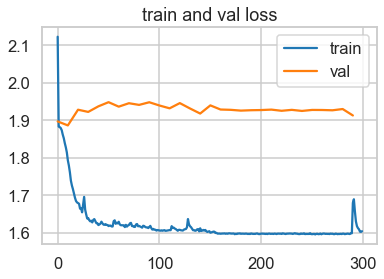

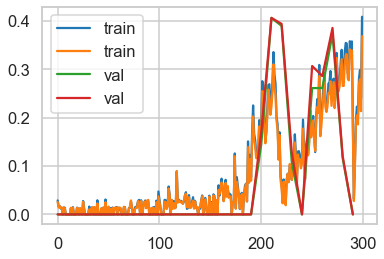

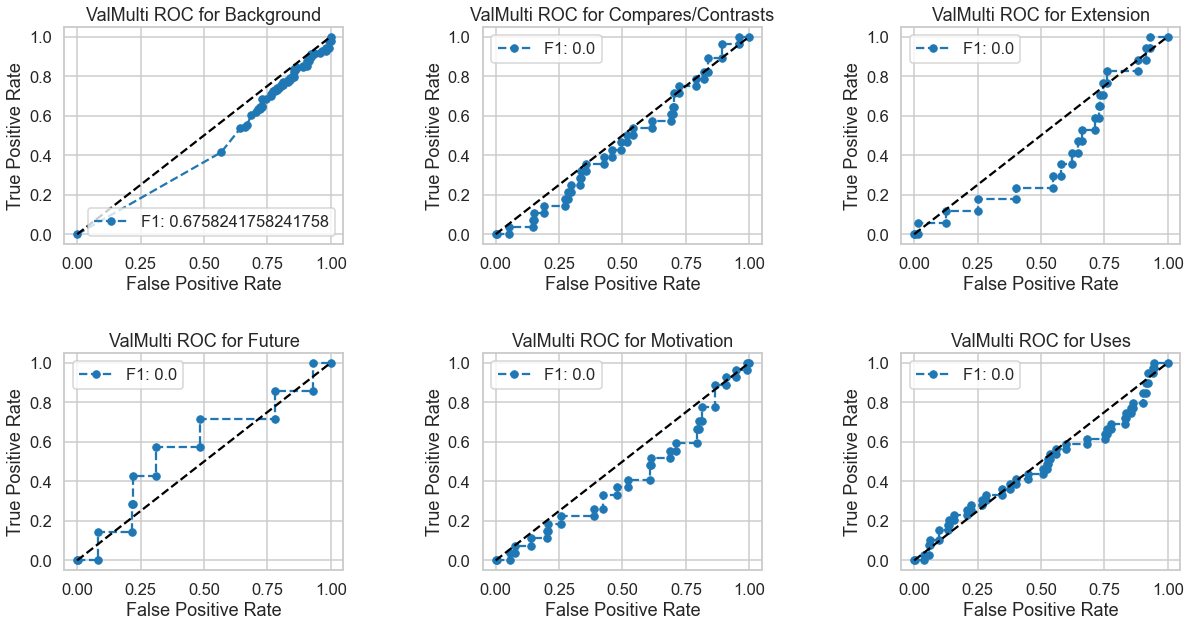

Val Loss: 1.902423


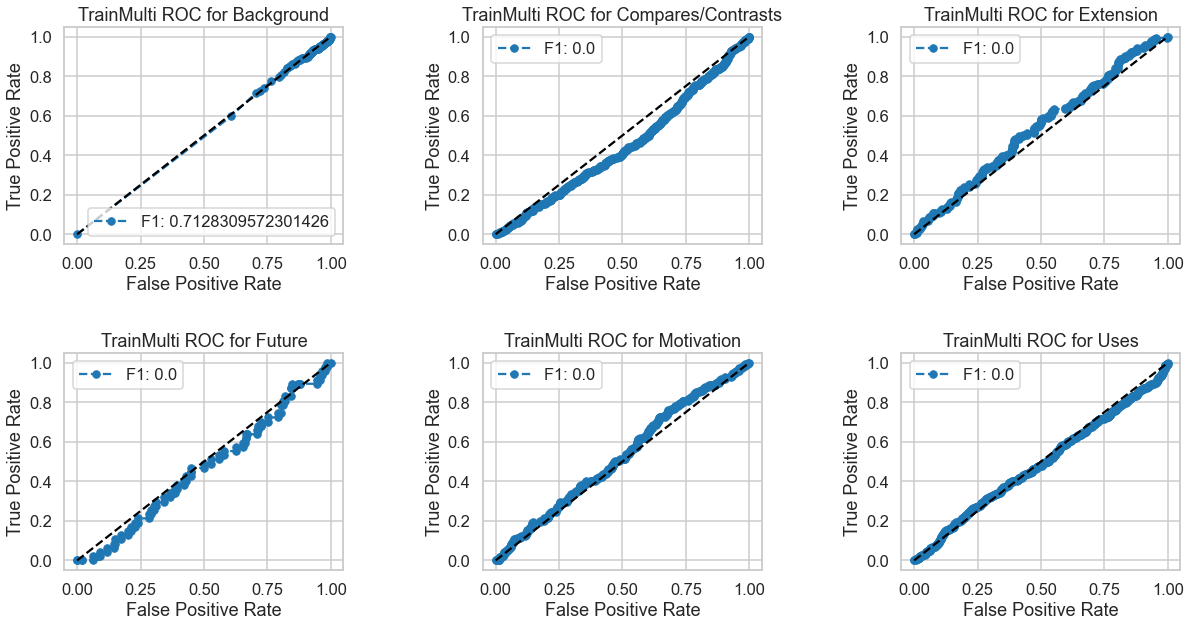

 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.47it/s]

GPU Enabled Beep Boop


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.03it/s]

Epoch: 1/300... Loss: 1.851276...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.72it/s]

Epoch: 2/300... Loss: 1.955902...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 3/300... Loss: 1.861390...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 4/300... Loss: 1.909055...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 5/300... Loss: 1.858282...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 6/300... Loss: 1.905321...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.25it/s]

Epoch: 7/300... Loss: 1.871139...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 8/300... Loss: 1.816716...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.56it/s]

Epoch: 9/300... Loss: 1.789563...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 10/300... Loss: 1.897465...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 11/300... Loss: 1.708270...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 12/300... Loss: 1.860670...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 13/300... Loss: 1.790636...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 14/300... Loss: 1.779516...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 15/300... Loss: 1.662375...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 16/300... Loss: 1.768008...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 17/300... Loss: 1.840980...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 18/300... Loss: 1.631680...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 19/300... Loss: 1.734478...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 20/300... Loss: 1.675293...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.25it/s]

Epoch: 21/300... Loss: 1.737746...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.04it/s]

Epoch: 22/300... Loss: 1.850355...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 23/300... Loss: 1.585052...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 24/300... Loss: 1.669254...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.54it/s]

Epoch: 25/300... Loss: 1.672601...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 26/300... Loss: 1.798723...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 27/300... Loss: 1.695359...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 28/300... Loss: 1.600695...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 29/300... Loss: 1.614514...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 30/300... Loss: 1.610623...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 31/300... Loss: 1.620259...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 32/300... Loss: 1.626929...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 33/300... Loss: 1.692198...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 34/300... Loss: 1.528932...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 35/300... Loss: 1.594684...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 36/300... Loss: 1.613493...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.41it/s]

Epoch: 37/300... Loss: 1.643898...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 38/300... Loss: 1.665179...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 39/300... Loss: 1.475623...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 40/300... Loss: 1.565913...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 27.27it/s]

Epoch: 41/300... Loss: 1.565159...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 42/300... Loss: 1.592061...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.71it/s]

Epoch: 43/300... Loss: 1.553864...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 44/300... Loss: 1.583398...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.70it/s]

Epoch: 45/300... Loss: 1.585070...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 46/300... Loss: 1.505852...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 47/300... Loss: 1.680131...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 48/300... Loss: 1.680068...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 49/300... Loss: 1.551748...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 50/300... Loss: 1.529249...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 51/300... Loss: 1.542784...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 52/300... Loss: 1.557091...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 53/300... Loss: 1.482325...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 54/300... Loss: 1.591318...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 55/300... Loss: 1.465632...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 56/300... Loss: 1.646758...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 57/300... Loss: 1.537370...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 58/300... Loss: 1.584350...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.72it/s]

Epoch: 59/300... Loss: 1.583184...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 60/300... Loss: 1.549805...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 61/300... Loss: 1.599173...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 62/300... Loss: 1.522417...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 63/300... Loss: 1.515060...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 64/300... Loss: 1.506088...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 27.97it/s]

Epoch: 65/300... Loss: 1.610954...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 13.15it/s]

Epoch: 66/300... Loss: 1.580227...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.60it/s]

Epoch: 67/300... Loss: 1.557273...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.52it/s]

Epoch: 68/300... Loss: 1.588248...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 69/300... Loss: 1.632461...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 16.53it/s]

Epoch: 70/300... Loss: 1.573887...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 71/300... Loss: 1.650639...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 16.95it/s]

Epoch: 72/300... Loss: 1.538079...


  5%|████▏                                                                              | 2/40 [00:00<00:03, 12.27it/s]

Epoch: 73/300... Loss: 1.529824...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 74/300... Loss: 1.572774...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 75/300... Loss: 1.605234...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 76/300... Loss: 1.626539...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 77/300... Loss: 1.530501...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 78/300... Loss: 1.556481...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 79/300... Loss: 1.577873...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 80/300... Loss: 1.478827...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 17.39it/s]

Epoch: 81/300... Loss: 1.607181...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 82/300... Loss: 1.729122...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 83/300... Loss: 1.527535...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 84/300... Loss: 1.486590...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 85/300... Loss: 1.530513...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 16.13it/s]

Epoch: 86/300... Loss: 1.522218...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 87/300... Loss: 1.469488...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.41it/s]

Epoch: 88/300... Loss: 1.602392...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 89/300... Loss: 1.557763...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 90/300... Loss: 1.559985...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 91/300... Loss: 1.561354...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 92/300... Loss: 1.554092...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.53it/s]

Epoch: 93/300... Loss: 1.543916...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 94/300... Loss: 1.542289...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.63it/s]

Epoch: 95/300... Loss: 1.471261...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 96/300... Loss: 1.554613...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 97/300... Loss: 1.616132...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 98/300... Loss: 1.607367...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 30.00it/s]

Epoch: 99/300... Loss: 1.421583...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 100/300... Loss: 1.500862...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 101/300... Loss: 1.483560...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 102/300... Loss: 1.610725...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 103/300... Loss: 1.607777...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 104/300... Loss: 1.579821...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.23it/s]

Epoch: 105/300... Loss: 1.489540...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 106/300... Loss: 1.599748...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.61it/s]

Epoch: 107/300... Loss: 1.523520...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 108/300... Loss: 1.510779...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.49it/s]

Epoch: 109/300... Loss: 1.674060...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 110/300... Loss: 1.495223...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.71it/s]

Epoch: 111/300... Loss: 1.494749...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 112/300... Loss: 1.540339...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 113/300... Loss: 1.502774...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 114/300... Loss: 1.669218...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 115/300... Loss: 1.553728...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 116/300... Loss: 1.592260...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 117/300... Loss: 1.576860...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 118/300... Loss: 1.539502...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 119/300... Loss: 1.434957...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 120/300... Loss: 1.496753...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 121/300... Loss: 1.607518...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 122/300... Loss: 1.562674...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 123/300... Loss: 1.542944...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.05it/s]

Epoch: 124/300... Loss: 1.504751...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.63it/s]

Epoch: 125/300... Loss: 1.560429...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.77it/s]

Epoch: 126/300... Loss: 1.566780...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 127/300... Loss: 1.515837...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 128/300... Loss: 1.664146...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.08it/s]

Epoch: 129/300... Loss: 1.525603...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 130/300... Loss: 1.573883...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.09it/s]

Epoch: 131/300... Loss: 1.549214...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 132/300... Loss: 1.631330...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 133/300... Loss: 1.619977...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 134/300... Loss: 1.675353...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.42it/s]

Epoch: 135/300... Loss: 1.563711...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 136/300... Loss: 1.467030...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 137/300... Loss: 1.562231...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 138/300... Loss: 1.633503...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 139/300... Loss: 1.521424...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 140/300... Loss: 1.527763...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 141/300... Loss: 1.519157...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 142/300... Loss: 1.668229...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 143/300... Loss: 1.610307...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 144/300... Loss: 1.653136...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 145/300... Loss: 1.600969...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 146/300... Loss: 1.651277...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 147/300... Loss: 1.622349...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 148/300... Loss: 1.553412...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 149/300... Loss: 1.539004...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 150/300... Loss: 1.512001...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 151/300... Loss: 1.573833...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 152/300... Loss: 1.666288...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 153/300... Loss: 1.554468...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 154/300... Loss: 1.522019...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 155/300... Loss: 1.589707...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 156/300... Loss: 1.532643...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 157/300... Loss: 1.566032...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 158/300... Loss: 1.509561...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 159/300... Loss: 1.539172...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 160/300... Loss: 1.626713...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 161/300... Loss: 1.657232...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 162/300... Loss: 1.649116...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 163/300... Loss: 1.485551...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 164/300... Loss: 1.575058...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 165/300... Loss: 1.571604...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 29.33it/s]

Epoch: 166/300... Loss: 1.725620...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 167/300... Loss: 1.577404...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 168/300... Loss: 1.473024...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 169/300... Loss: 1.538179...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 170/300... Loss: 1.562996...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 171/300... Loss: 1.568079...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 172/300... Loss: 1.500010...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 173/300... Loss: 1.586563...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 174/300... Loss: 1.647422...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 175/300... Loss: 1.496921...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 176/300... Loss: 1.536337...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 177/300... Loss: 1.654603...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 178/300... Loss: 1.548721...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 179/300... Loss: 1.623012...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 180/300... Loss: 1.645569...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 181/300... Loss: 1.690773...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 182/300... Loss: 1.463122...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 19.42it/s]

Epoch: 183/300... Loss: 1.572970...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 184/300... Loss: 1.523696...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.63it/s]

Epoch: 185/300... Loss: 1.504556...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 186/300... Loss: 1.579192...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 187/300... Loss: 1.500669...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 188/300... Loss: 1.452842...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 189/300... Loss: 1.554059...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 190/300... Loss: 1.511251...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 191/300... Loss: 1.599278...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.71it/s]

Epoch: 192/300... Loss: 1.573278...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 193/300... Loss: 1.507155...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 194/300... Loss: 1.578113...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 195/300... Loss: 1.527367...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 196/300... Loss: 1.587982...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 197/300... Loss: 1.559031...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 198/300... Loss: 1.645719...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 199/300... Loss: 1.633192...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 200/300... Loss: 1.560449...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 201/300... Loss: 1.640343...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 202/300... Loss: 1.485319...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 203/300... Loss: 1.513514...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 28.99it/s]

Epoch: 204/300... Loss: 1.584365...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 205/300... Loss: 1.536747...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 206/300... Loss: 1.487372...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 207/300... Loss: 1.573223...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 208/300... Loss: 1.488970...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 209/300... Loss: 1.519402...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 210/300... Loss: 1.540728...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.93it/s]

Epoch: 211/300... Loss: 1.538645...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 212/300... Loss: 1.708354...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 213/300... Loss: 1.579306...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 214/300... Loss: 1.553895...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.02it/s]

Epoch: 215/300... Loss: 1.541202...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 216/300... Loss: 1.468756...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 217/300... Loss: 1.561547...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 218/300... Loss: 1.532808...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 18.96it/s]

Epoch: 219/300... Loss: 1.563404...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 220/300... Loss: 1.601776...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.18it/s]

Epoch: 221/300... Loss: 1.543848...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 222/300... Loss: 1.557123...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 223/300... Loss: 1.550063...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 224/300... Loss: 1.641016...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.23it/s]

Epoch: 225/300... Loss: 1.556913...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 226/300... Loss: 1.587907...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 227/300... Loss: 1.587937...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 228/300... Loss: 1.599726...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 229/300... Loss: 1.504550...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 230/300... Loss: 1.542332...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 231/300... Loss: 1.551264...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 232/300... Loss: 1.595635...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 233/300... Loss: 1.626245...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 234/300... Loss: 1.536119...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 235/300... Loss: 1.712384...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 236/300... Loss: 1.493888...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 237/300... Loss: 1.607699...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 238/300... Loss: 1.551130...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 239/300... Loss: 1.594215...


  5%|████▏                                                                              | 2/40 [00:00<00:03, 11.56it/s]

Epoch: 240/300... Loss: 1.485701...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.55it/s]

Epoch: 241/300... Loss: 1.574086...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.98it/s]

Epoch: 242/300... Loss: 1.545841...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 243/300... Loss: 1.551451...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 244/300... Loss: 1.586843...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 245/300... Loss: 1.617256...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 246/300... Loss: 1.569401...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.36it/s]

Epoch: 247/300... Loss: 1.481825...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 248/300... Loss: 1.586106...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.71it/s]

Epoch: 249/300... Loss: 1.576354...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 250/300... Loss: 1.509439...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 251/300... Loss: 1.474766...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 252/300... Loss: 1.634310...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 253/300... Loss: 1.462671...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 254/300... Loss: 1.472801...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 255/300... Loss: 1.569650...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.03it/s]

Epoch: 256/300... Loss: 1.624857...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 257/300... Loss: 1.609431...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 258/300... Loss: 1.549044...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 259/300... Loss: 1.590573...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 260/300... Loss: 1.544263...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 261/300... Loss: 1.500741...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.11it/s]

Epoch: 262/300... Loss: 1.627147...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 263/300... Loss: 1.631996...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 264/300... Loss: 1.607210...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 265/300... Loss: 1.617847...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 266/300... Loss: 1.579823...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 267/300... Loss: 1.499783...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.04it/s]

Epoch: 268/300... Loss: 1.482860...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 269/300... Loss: 1.568967...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.41it/s]

Epoch: 270/300... Loss: 1.480816...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 271/300... Loss: 1.729405...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 272/300... Loss: 1.472011...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 273/300... Loss: 1.548353...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 274/300... Loss: 1.586927...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 275/300... Loss: 1.522279...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 276/300... Loss: 1.617079...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 277/300... Loss: 1.618158...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 278/300... Loss: 1.473828...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 279/300... Loss: 1.586948...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 280/300... Loss: 1.567257...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 281/300... Loss: 1.564715...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.43it/s]

Epoch: 282/300... Loss: 1.482404...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.72it/s]

Epoch: 283/300... Loss: 1.622215...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 284/300... Loss: 1.623749...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 285/300... Loss: 1.586370...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 286/300... Loss: 1.568089...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 287/300... Loss: 1.591640...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 288/300... Loss: 1.613986...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 289/300... Loss: 1.648116...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 290/300... Loss: 1.532925...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 291/300... Loss: 1.549496...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 292/300... Loss: 1.554267...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 293/300... Loss: 1.585337...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.25it/s]

Epoch: 294/300... Loss: 1.556183...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 295/300... Loss: 1.439138...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 296/300... Loss: 1.528664...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 297/300... Loss: 1.571112...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 298/300... Loss: 1.676260...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 299/300... Loss: 1.607957...


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.22it/s]


Epoch: 300/300... Loss: 1.596545...
Val Loss: 2.271065


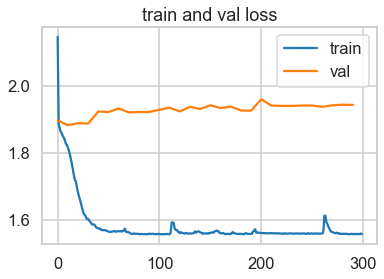

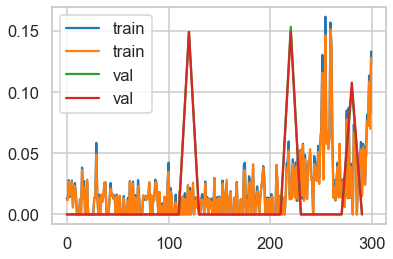

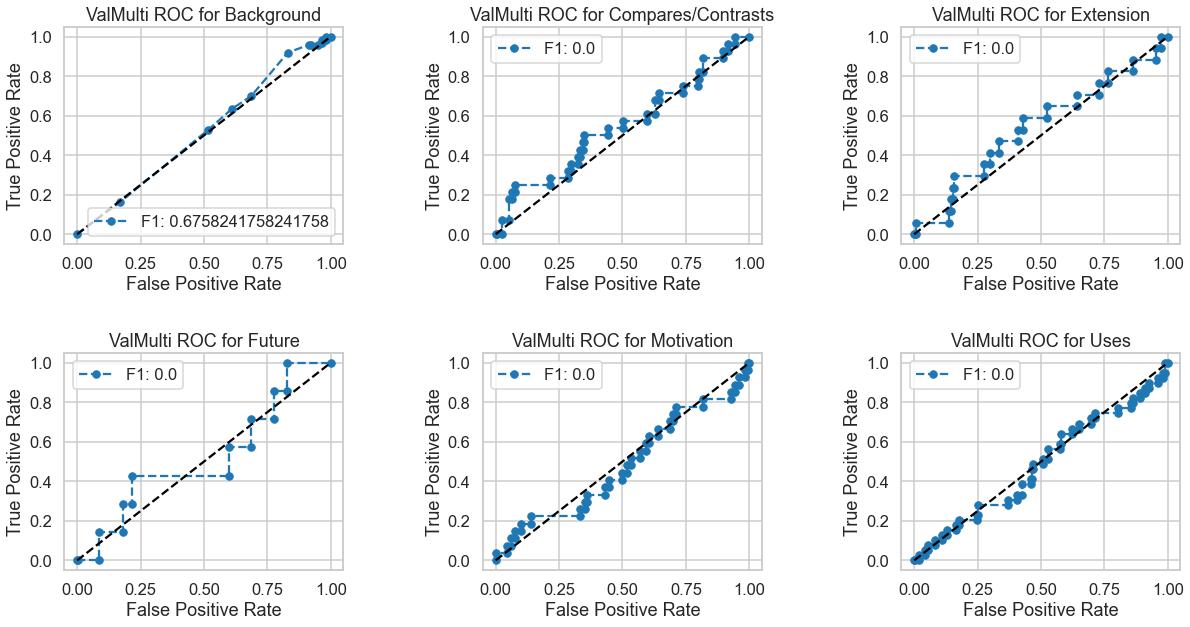

Val Loss: 1.861546


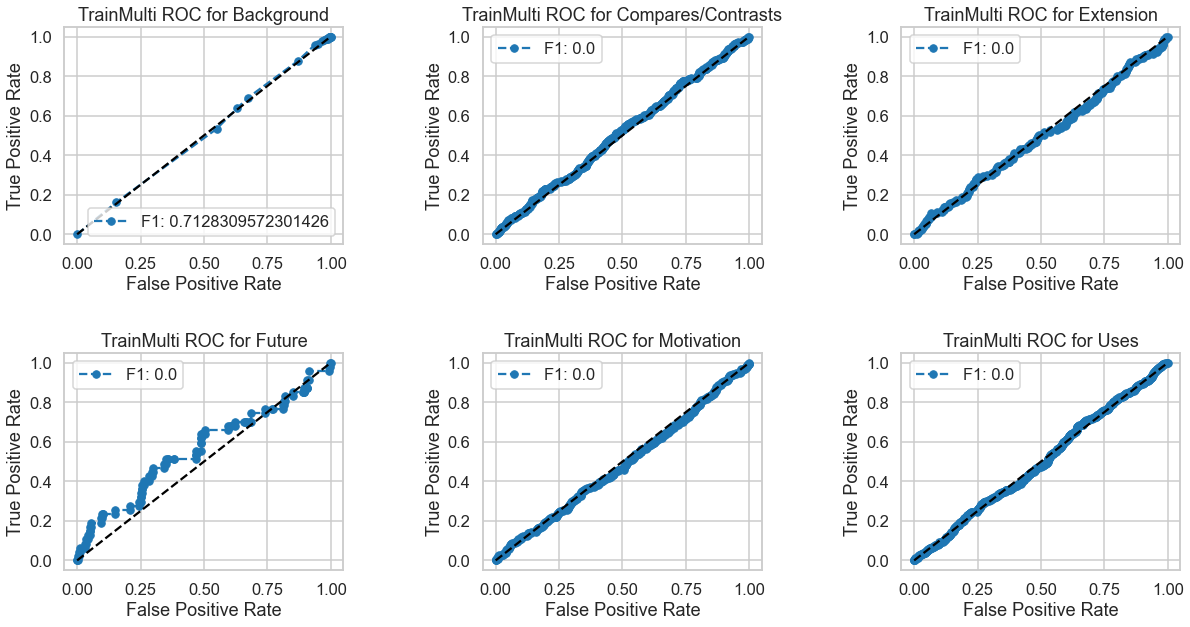

 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

GPU Enabled Beep Boop


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 1/300... Loss: 1.814184...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 2/300... Loss: 1.816140...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.63it/s]

Epoch: 3/300... Loss: 1.907706...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 4/300... Loss: 1.891982...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 5/300... Loss: 1.884819...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.02it/s]

Epoch: 6/300... Loss: 1.857443...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.74it/s]

Epoch: 7/300... Loss: 1.794021...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 48.08it/s]

Epoch: 8/300... Loss: 1.816437...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 49.51it/s]

Epoch: 9/300... Loss: 1.884357...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.60it/s]

Epoch: 10/300... Loss: 1.712026...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.05it/s]

Epoch: 11/300... Loss: 1.881163...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.02it/s]

Epoch: 12/300... Loss: 1.859434...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 13/300... Loss: 1.787350...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 14/300... Loss: 1.765659...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.85it/s]

Epoch: 15/300... Loss: 1.794164...


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 43.00it/s]

Epoch: 16/300... Loss: 1.808894...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 17/300... Loss: 1.946963...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 18/300... Loss: 1.866213...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 19/300... Loss: 1.799836...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.67it/s]

Epoch: 20/300... Loss: 1.924345...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.37it/s]

Epoch: 21/300... Loss: 1.804638...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.04it/s]

Epoch: 22/300... Loss: 1.859752...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 23/300... Loss: 1.839479...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.46it/s]

Epoch: 24/300... Loss: 1.917867...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 25/300... Loss: 1.903167...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 26/300... Loss: 1.719221...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.78it/s]

Epoch: 27/300... Loss: 1.913662...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 28/300... Loss: 1.871757...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 29/300... Loss: 1.669803...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.70it/s]

Epoch: 30/300... Loss: 1.643919...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 31/300... Loss: 1.673048...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 32/300... Loss: 1.695961...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.60it/s]

Epoch: 33/300... Loss: 1.716623...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 34/300... Loss: 1.742463...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 35/300... Loss: 1.624585...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 40.00it/s]

Epoch: 36/300... Loss: 1.812320...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 37/300... Loss: 1.768513...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.47it/s]

Epoch: 38/300... Loss: 1.647348...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.60it/s]

Epoch: 39/300... Loss: 1.815126...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 40/300... Loss: 1.649327...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.32it/s]

Epoch: 41/300... Loss: 1.625672...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 42/300... Loss: 1.745973...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.38it/s]

Epoch: 43/300... Loss: 1.556622...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.36it/s]

Epoch: 44/300... Loss: 1.628965...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.02it/s]

Epoch: 45/300... Loss: 1.621434...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.04it/s]

Epoch: 46/300... Loss: 1.609370...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 47/300... Loss: 1.693141...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 48/300... Loss: 1.794433...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.41it/s]

Epoch: 49/300... Loss: 1.566368...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.05it/s]

Epoch: 50/300... Loss: 1.639848...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.62it/s]

Epoch: 51/300... Loss: 1.609139...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.84it/s]

Epoch: 52/300... Loss: 1.554415...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.67it/s]

Epoch: 53/300... Loss: 1.639874...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.46it/s]

Epoch: 54/300... Loss: 1.537420...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.32it/s]

Epoch: 55/300... Loss: 1.702720...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 56/300... Loss: 1.763701...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 57/300... Loss: 1.574500...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.05it/s]

Epoch: 58/300... Loss: 1.622496...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 59/300... Loss: 1.646509...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.61it/s]

Epoch: 60/300... Loss: 1.626343...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.10it/s]

Epoch: 61/300... Loss: 1.581172...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 62/300... Loss: 1.748454...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.38it/s]

Epoch: 63/300... Loss: 1.687749...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 64/300... Loss: 1.622752...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 65/300... Loss: 1.682931...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.72it/s]

Epoch: 66/300... Loss: 1.472708...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 67/300... Loss: 1.609654...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.67it/s]

Epoch: 68/300... Loss: 1.570457...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 69/300... Loss: 1.752537...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.84it/s]

Epoch: 70/300... Loss: 1.544072...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.73it/s]

Epoch: 71/300... Loss: 1.624961...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.46it/s]

Epoch: 72/300... Loss: 1.776511...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.59it/s]

Epoch: 73/300... Loss: 1.663379...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.98it/s]

Epoch: 74/300... Loss: 1.625962...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.02it/s]

Epoch: 75/300... Loss: 1.568964...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.22it/s]

Epoch: 76/300... Loss: 1.549502...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 77/300... Loss: 1.544620...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.66it/s]

Epoch: 78/300... Loss: 1.595737...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 79/300... Loss: 1.573239...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 80/300... Loss: 1.672383...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.74it/s]

Epoch: 81/300... Loss: 1.703040...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 40.00it/s]

Epoch: 82/300... Loss: 1.522074...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.08it/s]

Epoch: 83/300... Loss: 1.436430...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 84/300... Loss: 1.528093...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 85/300... Loss: 1.478942...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 86/300... Loss: 1.571355...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.37it/s]

Epoch: 87/300... Loss: 1.680394...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.37it/s]

Epoch: 88/300... Loss: 1.620615...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 38.76it/s]

Epoch: 89/300... Loss: 1.550591...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.70it/s]

Epoch: 90/300... Loss: 1.498932...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.02it/s]

Epoch: 91/300... Loss: 1.502287...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.11it/s]

Epoch: 92/300... Loss: 1.559661...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 93/300... Loss: 1.562375...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.78it/s]

Epoch: 94/300... Loss: 1.540949...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 95/300... Loss: 1.525713...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.62it/s]

Epoch: 96/300... Loss: 1.507889...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 97/300... Loss: 1.532362...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.74it/s]

Epoch: 98/300... Loss: 1.531501...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 99/300... Loss: 1.487320...


 20%|████████████████▌                                                                  | 8/40 [00:00<00:00, 39.10it/s]

Epoch: 100/300... Loss: 1.475675...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.60it/s]

Epoch: 101/300... Loss: 1.509364...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 102/300... Loss: 1.523293...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 103/300... Loss: 1.492093...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.46it/s]

Epoch: 104/300... Loss: 1.593435...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.65it/s]

Epoch: 105/300... Loss: 1.523288...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.37it/s]

Epoch: 106/300... Loss: 1.475559...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 107/300... Loss: 1.519435...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 108/300... Loss: 1.499201...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.32it/s]

Epoch: 109/300... Loss: 1.479576...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 110/300... Loss: 1.584426...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 111/300... Loss: 1.532067...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 112/300... Loss: 1.484734...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 113/300... Loss: 1.481386...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.32it/s]

Epoch: 114/300... Loss: 1.491949...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 115/300... Loss: 1.536095...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 116/300... Loss: 1.489569...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 117/300... Loss: 1.502149...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 118/300... Loss: 1.549253...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 119/300... Loss: 1.506756...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 120/300... Loss: 1.483979...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 121/300... Loss: 1.481909...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 122/300... Loss: 1.523663...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 123/300... Loss: 1.515297...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.01it/s]

Epoch: 124/300... Loss: 1.535402...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 125/300... Loss: 1.531338...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 126/300... Loss: 1.524785...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.05it/s]

Epoch: 127/300... Loss: 1.581552...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 39.06it/s]

Epoch: 128/300... Loss: 1.496387...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.37it/s]

Epoch: 129/300... Loss: 1.537362...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 130/300... Loss: 1.541381...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.09it/s]

Epoch: 131/300... Loss: 1.534341...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.17it/s]

Epoch: 132/300... Loss: 1.510999...


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 40.23it/s]

Epoch: 133/300... Loss: 1.463512...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.73it/s]

Epoch: 134/300... Loss: 1.480372...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 135/300... Loss: 1.508364...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.29it/s]

Epoch: 136/300... Loss: 1.445797...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.62it/s]

Epoch: 137/300... Loss: 1.496719...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.73it/s]

Epoch: 138/300... Loss: 1.500715...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 139/300... Loss: 1.432642...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.32it/s]

Epoch: 140/300... Loss: 1.592903...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 141/300... Loss: 1.473735...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.17it/s]

Epoch: 142/300... Loss: 1.547084...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 143/300... Loss: 1.456299...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 49.02it/s]

Epoch: 144/300... Loss: 1.521707...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 145/300... Loss: 1.473342...


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 41.71it/s]

Epoch: 146/300... Loss: 1.550478...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.04it/s]

Epoch: 147/300... Loss: 1.545671...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.17it/s]

Epoch: 148/300... Loss: 1.597798...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 149/300... Loss: 1.500691...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 150/300... Loss: 1.571850...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 151/300... Loss: 1.465677...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.71it/s]

Epoch: 152/300... Loss: 1.516361...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.30it/s]

Epoch: 153/300... Loss: 1.451838...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 154/300... Loss: 1.487054...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.62it/s]

Epoch: 155/300... Loss: 1.442144...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 49.02it/s]

Epoch: 156/300... Loss: 1.625832...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 157/300... Loss: 1.491825...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 158/300... Loss: 1.555534...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.83it/s]

Epoch: 159/300... Loss: 1.519665...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.02it/s]

Epoch: 160/300... Loss: 1.487460...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.75it/s]

Epoch: 161/300... Loss: 1.583542...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 162/300... Loss: 1.543053...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.36it/s]

Epoch: 163/300... Loss: 1.553702...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.28it/s]

Epoch: 164/300... Loss: 1.540405...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.62it/s]

Epoch: 165/300... Loss: 1.437514...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.47it/s]

Epoch: 166/300... Loss: 1.509423...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 167/300... Loss: 1.537050...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.72it/s]

Epoch: 168/300... Loss: 1.512071...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 169/300... Loss: 1.602380...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.03it/s]

Epoch: 170/300... Loss: 1.526669...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.01it/s]

Epoch: 171/300... Loss: 1.524484...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 172/300... Loss: 1.510020...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 49.51it/s]

Epoch: 173/300... Loss: 1.512283...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 174/300... Loss: 1.472229...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 175/300... Loss: 1.511544...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.05it/s]

Epoch: 176/300... Loss: 1.512745...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 177/300... Loss: 1.515669...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 178/300... Loss: 1.520458...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 179/300... Loss: 1.551766...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.21it/s]

Epoch: 180/300... Loss: 1.482367...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 181/300... Loss: 1.530680...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 182/300... Loss: 1.431221...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.73it/s]

Epoch: 183/300... Loss: 1.492844...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 184/300... Loss: 1.659740...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.03it/s]

Epoch: 185/300... Loss: 1.460148...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.62it/s]

Epoch: 186/300... Loss: 1.587190...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 187/300... Loss: 1.484708...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 49.02it/s]

Epoch: 188/300... Loss: 1.547680...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 189/300... Loss: 1.459744...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 190/300... Loss: 1.556723...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 191/300... Loss: 1.448356...


 22%|██████████████████▋                                                                | 9/40 [00:00<00:00, 43.22it/s]

Epoch: 192/300... Loss: 1.515614...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.36it/s]

Epoch: 193/300... Loss: 1.560314...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 194/300... Loss: 1.466936...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 195/300... Loss: 1.420369...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.04it/s]

Epoch: 196/300... Loss: 1.482491...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.70it/s]

Epoch: 197/300... Loss: 1.585844...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 198/300... Loss: 1.535391...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.21it/s]

Epoch: 199/300... Loss: 1.545654...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.00it/s]

Epoch: 200/300... Loss: 1.539287...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.70it/s]

Epoch: 201/300... Loss: 1.512281...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.36it/s]

Epoch: 202/300... Loss: 1.522582...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.46it/s]

Epoch: 203/300... Loss: 1.501682...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 204/300... Loss: 1.440159...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 205/300... Loss: 1.523408...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.71it/s]

Epoch: 206/300... Loss: 1.473838...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.04it/s]

Epoch: 207/300... Loss: 1.516722...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.04it/s]

Epoch: 208/300... Loss: 1.514532...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.21it/s]

Epoch: 209/300... Loss: 1.462445...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 210/300... Loss: 1.497631...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.70it/s]

Epoch: 211/300... Loss: 1.602509...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 212/300... Loss: 1.554907...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 213/300... Loss: 1.565645...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.04it/s]

Epoch: 214/300... Loss: 1.524467...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.65it/s]

Epoch: 215/300... Loss: 1.487403...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.37it/s]

Epoch: 216/300... Loss: 1.471602...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 217/300... Loss: 1.541177...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 39.68it/s]

Epoch: 218/300... Loss: 1.636708...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 219/300... Loss: 1.517174...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.00it/s]

Epoch: 220/300... Loss: 1.467805...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.74it/s]

Epoch: 221/300... Loss: 1.500537...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.04it/s]

Epoch: 222/300... Loss: 1.491602...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.36it/s]

Epoch: 223/300... Loss: 1.517785...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.07it/s]

Epoch: 224/300... Loss: 1.486915...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.70it/s]

Epoch: 225/300... Loss: 1.646914...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.04it/s]

Epoch: 226/300... Loss: 1.508485...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 227/300... Loss: 1.533828...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 228/300... Loss: 1.484609...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.32it/s]

Epoch: 229/300... Loss: 1.510559...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 230/300... Loss: 1.480304...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 231/300... Loss: 1.438280...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.38it/s]

Epoch: 232/300... Loss: 1.513928...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 233/300... Loss: 1.611928...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 234/300... Loss: 1.457099...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 235/300... Loss: 1.514555...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.36it/s]

Epoch: 236/300... Loss: 1.498545...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 237/300... Loss: 1.457591...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 238/300... Loss: 1.511407...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.32it/s]

Epoch: 239/300... Loss: 1.456509...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.36it/s]

Epoch: 240/300... Loss: 1.526845...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.73it/s]

Epoch: 241/300... Loss: 1.581992...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.05it/s]

Epoch: 242/300... Loss: 1.446052...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.04it/s]

Epoch: 243/300... Loss: 1.567061...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.46it/s]

Epoch: 244/300... Loss: 1.464937...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.37it/s]

Epoch: 245/300... Loss: 1.518420...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.17it/s]

Epoch: 246/300... Loss: 1.473658...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 247/300... Loss: 1.491400...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 248/300... Loss: 1.496089...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.15it/s]

Epoch: 249/300... Loss: 1.473742...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.64it/s]

Epoch: 250/300... Loss: 1.482233...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 41.32it/s]

Epoch: 251/300... Loss: 1.541342...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.22it/s]

Epoch: 252/300... Loss: 1.471292...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.10it/s]

Epoch: 253/300... Loss: 1.461836...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.04it/s]

Epoch: 254/300... Loss: 1.524766...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 255/300... Loss: 1.602178...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.17it/s]

Epoch: 256/300... Loss: 1.568193...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 257/300... Loss: 1.559175...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 258/300... Loss: 1.434933...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.46it/s]

Epoch: 259/300... Loss: 1.561522...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.00it/s]

Epoch: 260/300... Loss: 1.520554...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 261/300... Loss: 1.563690...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 262/300... Loss: 1.542008...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.47it/s]

Epoch: 263/300... Loss: 1.483654...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 264/300... Loss: 1.461639...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.37it/s]

Epoch: 265/300... Loss: 1.468914...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 266/300... Loss: 1.456040...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 267/300... Loss: 1.448197...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.17it/s]

Epoch: 268/300... Loss: 1.495135...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 269/300... Loss: 1.490824...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.78it/s]

Epoch: 270/300... Loss: 1.432031...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.46it/s]

Epoch: 271/300... Loss: 1.621994...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.46it/s]

Epoch: 272/300... Loss: 1.576440...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.64it/s]

Epoch: 273/300... Loss: 1.454385...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 274/300... Loss: 1.532007...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.86it/s]

Epoch: 275/300... Loss: 1.518059...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 276/300... Loss: 1.514055...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.05it/s]

Epoch: 277/300... Loss: 1.455458...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.22it/s]

Epoch: 278/300... Loss: 1.517784...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.73it/s]

Epoch: 279/300... Loss: 1.564801...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 280/300... Loss: 1.462116...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.45it/s]

Epoch: 281/300... Loss: 1.480167...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 48.54it/s]

Epoch: 282/300... Loss: 1.472883...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.88it/s]

Epoch: 283/300... Loss: 1.509577...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 43.48it/s]

Epoch: 284/300... Loss: 1.458802...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 48.08it/s]

Epoch: 285/300... Loss: 1.495402...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 45.87it/s]

Epoch: 286/300... Loss: 1.480078...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.63it/s]

Epoch: 287/300... Loss: 1.526733...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 44.25it/s]

Epoch: 288/300... Loss: 1.474927...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.98it/s]

Epoch: 289/300... Loss: 1.508589...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 290/300... Loss: 1.624444...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.37it/s]

Epoch: 291/300... Loss: 1.477722...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 47.62it/s]

Epoch: 292/300... Loss: 1.526987...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 40.65it/s]

Epoch: 293/300... Loss: 1.464621...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 46.30it/s]

Epoch: 294/300... Loss: 1.472107...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 39.68it/s]

Epoch: 295/300... Loss: 1.536190...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.71it/s]

Epoch: 296/300... Loss: 1.688532...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.38it/s]

Epoch: 297/300... Loss: 1.496274...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.74it/s]

Epoch: 298/300... Loss: 1.548981...


 12%|██████████▍                                                                        | 5/40 [00:00<00:00, 42.73it/s]

Epoch: 299/300... Loss: 1.427399...


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 43.76it/s]


Epoch: 300/300... Loss: 1.469531...
Val Loss: 2.255763


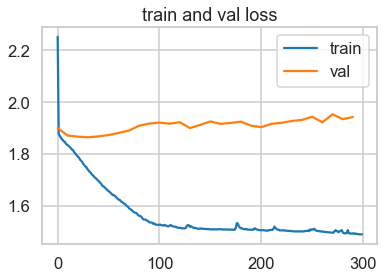

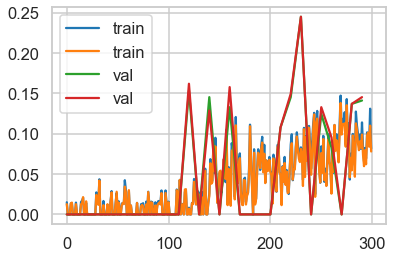

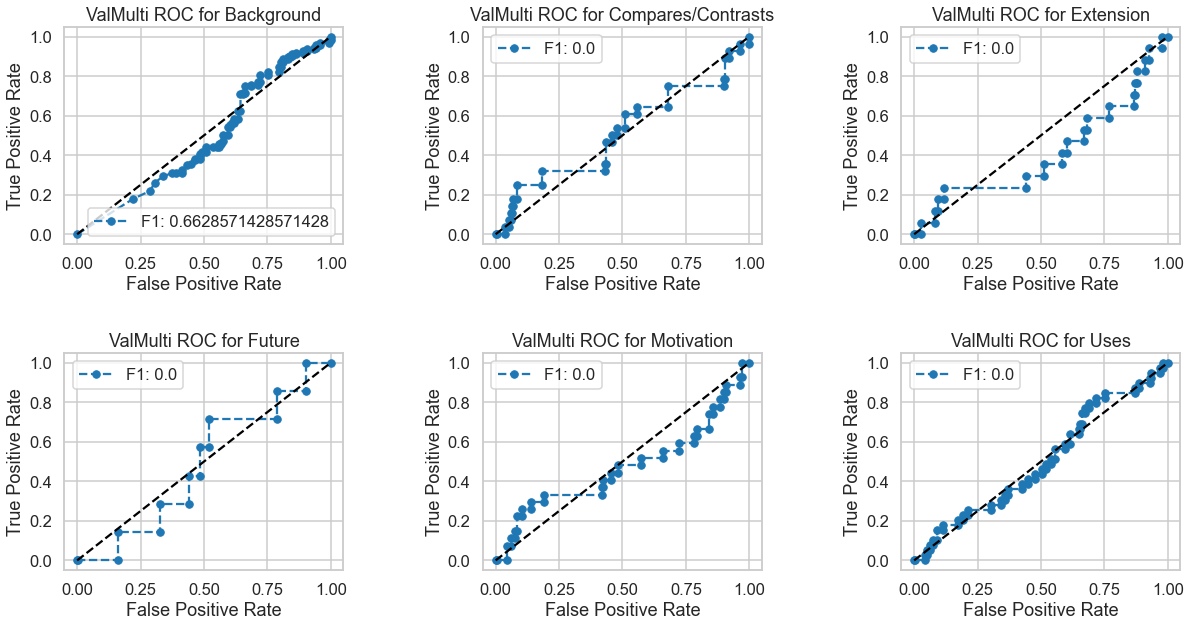

Val Loss: 1.739003


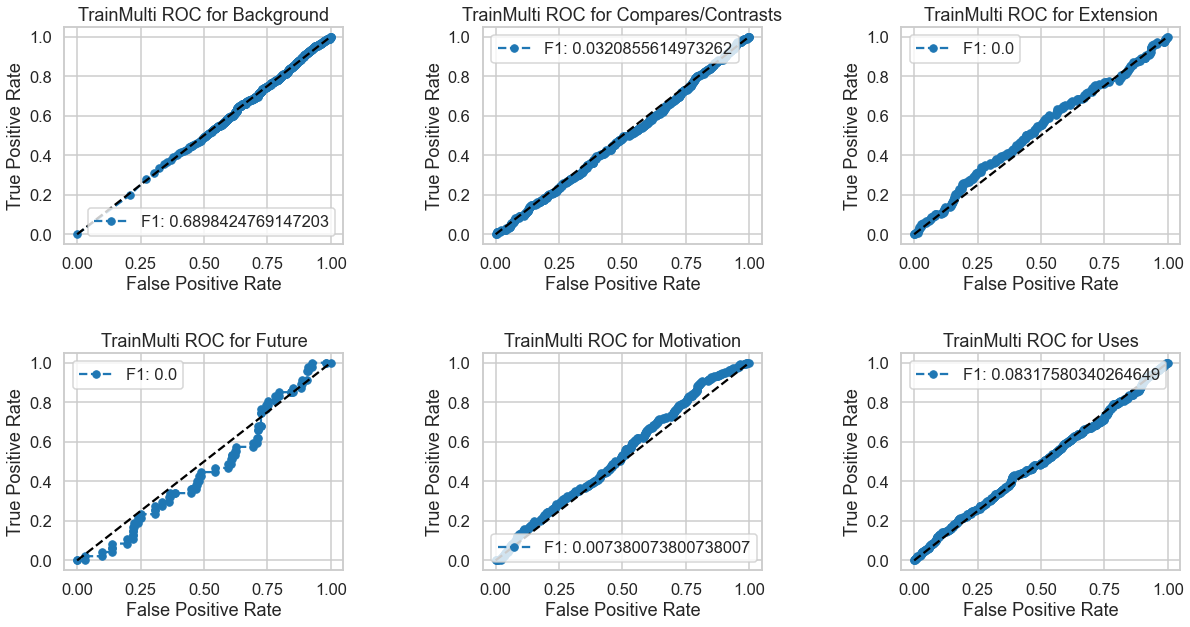

  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

GPU Enabled Beep Boop


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 1/300... Loss: 1.831725...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 2/300... Loss: 1.920071...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 3/300... Loss: 1.908451...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.23it/s]

Epoch: 4/300... Loss: 1.844227...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 5/300... Loss: 1.944702...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 6/300... Loss: 2.000138...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 7/300... Loss: 1.784042...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 8/300... Loss: 1.874688...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 9/300... Loss: 1.838054...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 10/300... Loss: 1.915098...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 11/300... Loss: 1.728583...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 12/300... Loss: 1.781437...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 13/300... Loss: 1.626330...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 14/300... Loss: 1.787531...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 15/300... Loss: 1.734455...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 16/300... Loss: 1.737200...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.23it/s]

Epoch: 17/300... Loss: 1.753300...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.08it/s]

Epoch: 18/300... Loss: 1.760336...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 19/300... Loss: 1.906133...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 20/300... Loss: 1.635135...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 21/300... Loss: 1.616896...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 22/300... Loss: 1.828087...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 23/300... Loss: 1.526751...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 24/300... Loss: 1.594714...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 25/300... Loss: 1.801536...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 26/300... Loss: 1.834155...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 27/300... Loss: 1.722228...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 28/300... Loss: 1.723085...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 20.00it/s]

Epoch: 29/300... Loss: 1.697224...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.52it/s]

Epoch: 30/300... Loss: 1.577255...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.69it/s]

Epoch: 31/300... Loss: 1.677408...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 32/300... Loss: 1.665674...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.27it/s]

Epoch: 33/300... Loss: 1.650798...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 34/300... Loss: 1.658042...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 35/300... Loss: 1.634218...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 36/300... Loss: 1.604236...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 37/300... Loss: 1.552671...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 38/300... Loss: 1.551162...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 39/300... Loss: 1.661189...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 40/300... Loss: 1.722775...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 41/300... Loss: 1.677202...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 42/300... Loss: 1.615454...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 43/300... Loss: 1.751966...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 44/300... Loss: 1.688027...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 45/300... Loss: 1.720398...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 46/300... Loss: 1.641921...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 47/300... Loss: 1.666196...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 48/300... Loss: 1.555683...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 49/300... Loss: 1.720374...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 50/300... Loss: 1.607590...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.61it/s]

Epoch: 51/300... Loss: 1.743160...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 52/300... Loss: 1.631596...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 53/300... Loss: 1.739349...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 54/300... Loss: 1.503780...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 55/300... Loss: 1.701159...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 56/300... Loss: 1.628630...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 57/300... Loss: 1.542183...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 58/300... Loss: 1.523689...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 59/300... Loss: 1.634455...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 60/300... Loss: 1.620727...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 61/300... Loss: 1.913735...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 62/300... Loss: 1.733116...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 63/300... Loss: 1.758824...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 64/300... Loss: 1.728848...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 65/300... Loss: 1.562226...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 66/300... Loss: 1.477836...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 67/300... Loss: 1.694329...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 68/300... Loss: 1.588320...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.13it/s]

Epoch: 69/300... Loss: 1.762264...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.80it/s]

Epoch: 70/300... Loss: 1.709020...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 71/300... Loss: 1.484777...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 72/300... Loss: 1.633779...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 73/300... Loss: 1.576419...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 74/300... Loss: 1.801332...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 75/300... Loss: 1.723179...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.69it/s]

Epoch: 76/300... Loss: 1.651688...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 77/300... Loss: 1.643016...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 78/300... Loss: 1.570308...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 79/300... Loss: 1.561263...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 80/300... Loss: 1.720996...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 81/300... Loss: 1.628253...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 82/300... Loss: 1.683439...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.69it/s]

Epoch: 83/300... Loss: 1.527056...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.87it/s]

Epoch: 84/300... Loss: 1.671893...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 85/300... Loss: 1.681320...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 86/300... Loss: 1.611068...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 87/300... Loss: 1.609747...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 88/300... Loss: 1.594298...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.13it/s]

Epoch: 89/300... Loss: 1.603135...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 90/300... Loss: 1.503197...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 91/300... Loss: 1.632919...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 92/300... Loss: 1.594213...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 19.35it/s]

Epoch: 93/300... Loss: 1.901021...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.42it/s]

Epoch: 94/300... Loss: 1.620931...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 17.86it/s]

Epoch: 95/300... Loss: 1.736460...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 96/300... Loss: 1.544362...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 97/300... Loss: 1.658408...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.73it/s]

Epoch: 98/300... Loss: 1.626761...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 99/300... Loss: 1.651322...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.69it/s]

Epoch: 100/300... Loss: 1.665981...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 101/300... Loss: 1.539353...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 17.86it/s]

Epoch: 102/300... Loss: 1.679793...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 19.61it/s]

Epoch: 103/300... Loss: 1.567452...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 104/300... Loss: 1.559313...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 105/300... Loss: 1.445309...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 106/300... Loss: 1.593172...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.27it/s]

Epoch: 107/300... Loss: 1.667498...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.55it/s]

Epoch: 108/300... Loss: 1.637503...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 109/300... Loss: 1.639442...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.38it/s]

Epoch: 110/300... Loss: 1.561556...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 111/300... Loss: 1.551964...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 112/300... Loss: 1.509915...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.73it/s]

Epoch: 113/300... Loss: 1.649433...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.12it/s]

Epoch: 114/300... Loss: 1.634018...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 115/300... Loss: 1.592665...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 116/300... Loss: 1.647377...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.73it/s]

Epoch: 117/300... Loss: 1.639982...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.55it/s]

Epoch: 118/300... Loss: 1.663878...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 119/300... Loss: 1.544273...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 120/300... Loss: 1.633287...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 121/300... Loss: 1.688764...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.89it/s]

Epoch: 122/300... Loss: 1.509885...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 123/300... Loss: 1.642591...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 124/300... Loss: 1.708494...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 125/300... Loss: 1.699470...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 126/300... Loss: 1.615184...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.98it/s]

Epoch: 127/300... Loss: 1.423255...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 128/300... Loss: 1.749475...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.05it/s]

Epoch: 129/300... Loss: 1.556081...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 130/300... Loss: 1.590868...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 131/300... Loss: 1.604747...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 132/300... Loss: 1.556545...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 133/300... Loss: 1.524011...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.05it/s]

Epoch: 134/300... Loss: 1.723910...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 135/300... Loss: 1.514699...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.13it/s]

Epoch: 136/300... Loss: 1.596402...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 137/300... Loss: 1.623125...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 138/300... Loss: 1.637903...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 139/300... Loss: 1.494863...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 140/300... Loss: 1.636779...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 141/300... Loss: 1.518916...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 142/300... Loss: 1.704341...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 143/300... Loss: 1.507384...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.41it/s]

Epoch: 144/300... Loss: 1.676224...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.69it/s]

Epoch: 145/300... Loss: 1.510756...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.13it/s]

Epoch: 146/300... Loss: 1.631846...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 147/300... Loss: 1.716195...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 148/300... Loss: 1.561296...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 149/300... Loss: 1.599507...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.98it/s]

Epoch: 150/300... Loss: 1.487167...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.13it/s]

Epoch: 151/300... Loss: 1.656346...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.00it/s]

Epoch: 152/300... Loss: 1.623851...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.69it/s]

Epoch: 153/300... Loss: 1.634720...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 154/300... Loss: 1.464285...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.42it/s]

Epoch: 155/300... Loss: 1.640149...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 156/300... Loss: 1.657583...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 157/300... Loss: 1.611194...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 158/300... Loss: 1.550604...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 159/300... Loss: 1.598262...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 160/300... Loss: 1.662564...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 161/300... Loss: 1.628081...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 162/300... Loss: 1.574757...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.13it/s]

Epoch: 163/300... Loss: 1.592953...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 164/300... Loss: 1.648530...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.98it/s]

Epoch: 165/300... Loss: 1.587538...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.38it/s]

Epoch: 166/300... Loss: 1.615298...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 167/300... Loss: 1.752352...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 168/300... Loss: 1.678731...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.13it/s]

Epoch: 169/300... Loss: 1.451155...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 170/300... Loss: 1.701055...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.98it/s]

Epoch: 171/300... Loss: 1.604325...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.43it/s]

Epoch: 172/300... Loss: 1.731580...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 173/300... Loss: 1.543101...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 174/300... Loss: 1.542171...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 175/300... Loss: 1.553390...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 176/300... Loss: 1.618559...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 177/300... Loss: 1.630190...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 178/300... Loss: 1.658537...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 179/300... Loss: 1.674959...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 180/300... Loss: 1.573134...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 181/300... Loss: 1.604954...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.72it/s]

Epoch: 182/300... Loss: 1.487801...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 183/300... Loss: 1.668498...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.38it/s]

Epoch: 184/300... Loss: 1.574232...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 185/300... Loss: 1.555638...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 186/300... Loss: 1.654576...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 187/300... Loss: 1.716347...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 188/300... Loss: 1.549555...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 189/300... Loss: 1.514972...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 190/300... Loss: 1.604320...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 191/300... Loss: 1.660576...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 192/300... Loss: 1.661095...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 193/300... Loss: 1.595283...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 194/300... Loss: 1.592219...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 195/300... Loss: 1.571734...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 196/300... Loss: 1.594537...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 197/300... Loss: 1.654528...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.69it/s]

Epoch: 198/300... Loss: 1.878598...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.38it/s]

Epoch: 199/300... Loss: 1.546056...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 200/300... Loss: 1.518277...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.23it/s]

Epoch: 201/300... Loss: 1.476884...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 202/300... Loss: 1.592823...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 203/300... Loss: 1.531718...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 204/300... Loss: 1.596777...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 205/300... Loss: 1.566832...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 18.71it/s]

Epoch: 206/300... Loss: 1.710143...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.87it/s]

Epoch: 207/300... Loss: 1.709262...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 208/300... Loss: 1.598547...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 209/300... Loss: 1.546269...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 210/300... Loss: 1.580925...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 211/300... Loss: 1.451743...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 212/300... Loss: 1.606530...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 213/300... Loss: 1.609934...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 214/300... Loss: 1.609628...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 215/300... Loss: 1.546050...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 216/300... Loss: 1.582449...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 217/300... Loss: 1.603599...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 218/300... Loss: 1.690324...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 219/300... Loss: 1.563633...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 220/300... Loss: 1.617785...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 221/300... Loss: 1.655300...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 222/300... Loss: 1.593727...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 223/300... Loss: 1.544454...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 224/300... Loss: 1.575069...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.38it/s]

Epoch: 225/300... Loss: 1.808167...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 226/300... Loss: 1.560200...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 227/300... Loss: 1.643129...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 228/300... Loss: 1.730651...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.05it/s]

Epoch: 229/300... Loss: 1.504689...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 230/300... Loss: 1.637214...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.38it/s]

Epoch: 231/300... Loss: 1.673938...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 232/300... Loss: 1.551655...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 233/300... Loss: 1.586045...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 234/300... Loss: 1.505123...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 235/300... Loss: 1.605212...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 236/300... Loss: 1.715210...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 237/300... Loss: 1.674188...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 238/300... Loss: 1.601847...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 239/300... Loss: 1.691087...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.13it/s]

Epoch: 240/300... Loss: 1.575553...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 241/300... Loss: 1.519492...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.72it/s]

Epoch: 242/300... Loss: 1.551836...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.55it/s]

Epoch: 243/300... Loss: 1.566495...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 17.54it/s]

Epoch: 244/300... Loss: 1.608441...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.23it/s]

Epoch: 245/300... Loss: 1.571986...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.69it/s]

Epoch: 246/300... Loss: 1.576957...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.42it/s]

Epoch: 247/300... Loss: 1.657934...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 248/300... Loss: 1.527720...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 19.61it/s]

Epoch: 249/300... Loss: 1.633286...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 250/300... Loss: 1.551213...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 251/300... Loss: 1.820289...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 252/300... Loss: 1.557041...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.43it/s]

Epoch: 253/300... Loss: 1.544239...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 254/300... Loss: 1.742172...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 255/300... Loss: 1.651655...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 256/300... Loss: 1.519261...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 257/300... Loss: 1.477253...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 258/300... Loss: 1.499665...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 259/300... Loss: 1.643188...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 260/300... Loss: 1.540736...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 261/300... Loss: 1.529709...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 262/300... Loss: 1.532428...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 263/300... Loss: 1.503549...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.22it/s]

Epoch: 264/300... Loss: 1.598441...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 265/300... Loss: 1.625676...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 266/300... Loss: 1.676185...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 267/300... Loss: 1.548319...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 268/300... Loss: 1.608771...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 269/300... Loss: 1.427881...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 270/300... Loss: 1.635612...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 271/300... Loss: 1.688633...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 272/300... Loss: 1.556794...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 273/300... Loss: 1.459744...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 274/300... Loss: 1.596696...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.80it/s]

Epoch: 275/300... Loss: 1.626393...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.42it/s]

Epoch: 276/300... Loss: 1.608593...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 277/300... Loss: 1.586220...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.25it/s]

Epoch: 278/300... Loss: 1.707886...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 279/300... Loss: 1.560011...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 280/300... Loss: 1.734131...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 281/300... Loss: 1.746018...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 282/300... Loss: 1.635396...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 283/300... Loss: 1.575992...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 284/300... Loss: 1.677387...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 285/300... Loss: 1.575616...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 286/300... Loss: 1.569209...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 287/300... Loss: 1.670056...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 288/300... Loss: 1.707299...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.05it/s]

Epoch: 289/300... Loss: 1.683629...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 290/300... Loss: 1.564678...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.25it/s]

Epoch: 291/300... Loss: 1.587574...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.38it/s]

Epoch: 292/300... Loss: 1.694507...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.90it/s]

Epoch: 293/300... Loss: 1.578954...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 294/300... Loss: 1.484095...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 295/300... Loss: 1.454358...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 296/300... Loss: 1.650812...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.43it/s]

Epoch: 297/300... Loss: 1.571097...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.72it/s]

Epoch: 298/300... Loss: 1.584091...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.38it/s]

Epoch: 299/300... Loss: 1.539807...


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 22.51it/s]


Epoch: 300/300... Loss: 1.649246...
Val Loss: 2.281024


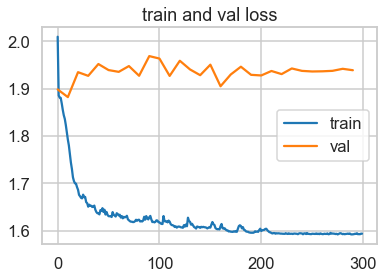

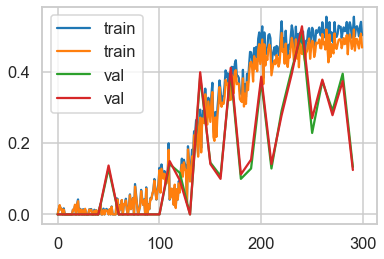

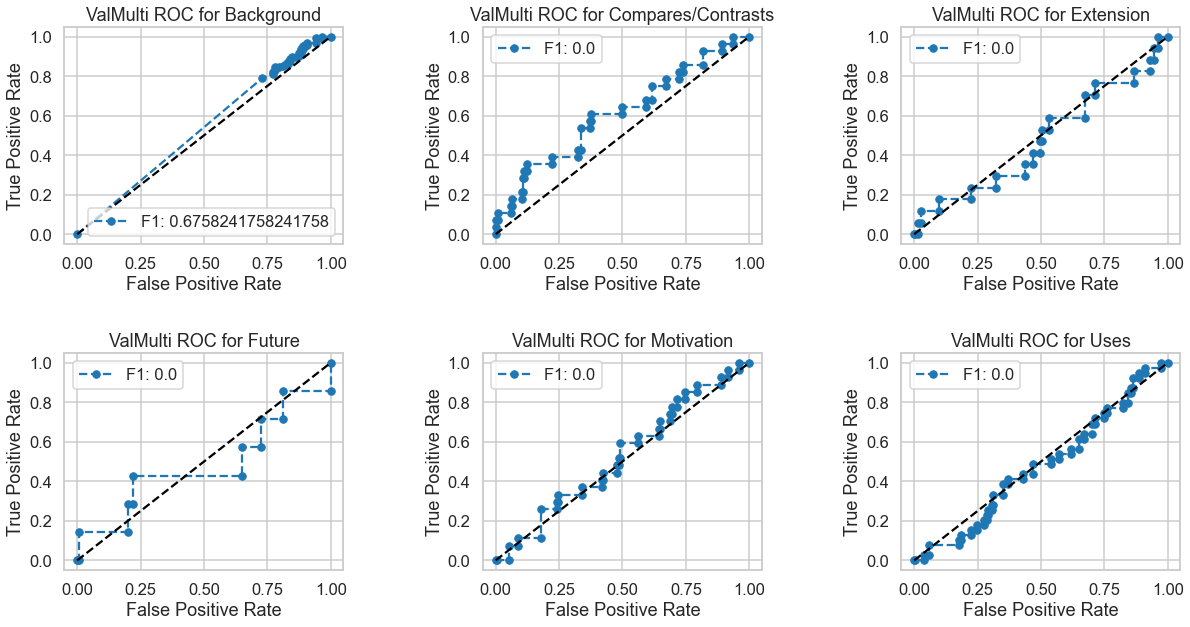

Val Loss: 1.893963


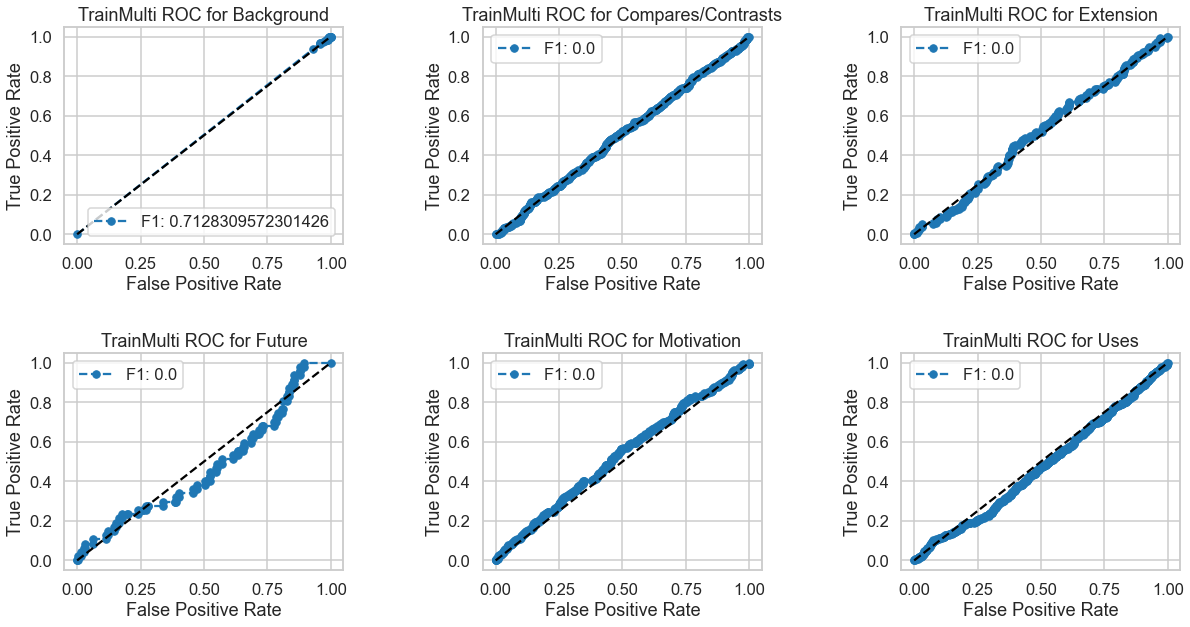

 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.34it/s]

GPU Enabled Beep Boop


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.25it/s]

Epoch: 1/300... Loss: 1.865743...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 27.59it/s]

Epoch: 2/300... Loss: 1.953946...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 3/300... Loss: 1.897592...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 4/300... Loss: 1.809932...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 5/300... Loss: 1.785281...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.63it/s]

Epoch: 6/300... Loss: 1.869101...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 7/300... Loss: 1.797911...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.99it/s]

Epoch: 8/300... Loss: 1.790865...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.49it/s]

Epoch: 9/300... Loss: 1.829447...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.99it/s]

Epoch: 10/300... Loss: 1.883838...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.08it/s]

Epoch: 11/300... Loss: 1.940257...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 12/300... Loss: 1.824414...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 13/300... Loss: 1.888875...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 14/300... Loss: 1.711444...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 15/300... Loss: 1.817755...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 16/300... Loss: 1.719564...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.44it/s]

Epoch: 17/300... Loss: 1.648511...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 18/300... Loss: 1.773484...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 19/300... Loss: 1.665341...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 20/300... Loss: 1.547480...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.31it/s]

Epoch: 21/300... Loss: 1.615858...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 29.79it/s]

Epoch: 22/300... Loss: 1.698922...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 23/300... Loss: 1.731136...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 24/300... Loss: 1.630594...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.85it/s]

Epoch: 25/300... Loss: 1.595390...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 26/300... Loss: 1.641966...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 27/300... Loss: 1.533314...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 28/300... Loss: 1.545527...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 29/300... Loss: 1.529580...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 30/300... Loss: 1.552684...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 31/300... Loss: 1.574652...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 32/300... Loss: 1.597777...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 33/300... Loss: 1.555156...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 34/300... Loss: 1.633329...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 35/300... Loss: 1.575521...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 36/300... Loss: 1.580056...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 37/300... Loss: 1.546661...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.83it/s]

Epoch: 38/300... Loss: 1.617039...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 39/300... Loss: 1.502552...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 29.59it/s]

Epoch: 40/300... Loss: 1.526558...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 41/300... Loss: 1.584812...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 29.47it/s]

Epoch: 42/300... Loss: 1.586504...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 43/300... Loss: 1.629053...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.85it/s]

Epoch: 44/300... Loss: 1.599041...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 45/300... Loss: 1.578169...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 46/300... Loss: 1.661841...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.00it/s]

Epoch: 47/300... Loss: 1.615836...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 48/300... Loss: 1.680508...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 49/300... Loss: 1.750374...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 50/300... Loss: 1.555367...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.69it/s]

Epoch: 51/300... Loss: 1.622990...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 52/300... Loss: 1.714892...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.25it/s]

Epoch: 53/300... Loss: 1.746585...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 54/300... Loss: 1.520015...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 55/300... Loss: 1.501493...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.25it/s]

Epoch: 56/300... Loss: 1.525464...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 57/300... Loss: 1.589740...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 58/300... Loss: 1.488865...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.54it/s]

Epoch: 59/300... Loss: 1.584616...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 60/300... Loss: 1.637459...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 61/300... Loss: 1.499552...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.58it/s]

Epoch: 62/300... Loss: 1.718595...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 63/300... Loss: 1.593267...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 64/300... Loss: 1.525453...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 65/300... Loss: 1.594441...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 66/300... Loss: 1.577806...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 67/300... Loss: 1.647664...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.84it/s]

Epoch: 68/300... Loss: 1.632366...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 69/300... Loss: 1.631168...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 70/300... Loss: 1.718646...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 71/300... Loss: 1.642568...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.69it/s]

Epoch: 72/300... Loss: 1.611717...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 73/300... Loss: 1.588196...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 74/300... Loss: 1.560502...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 75/300... Loss: 1.512021...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 76/300... Loss: 1.599927...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.74it/s]

Epoch: 77/300... Loss: 1.603123...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.76it/s]

Epoch: 78/300... Loss: 1.633271...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.71it/s]

Epoch: 79/300... Loss: 1.594364...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.08it/s]

Epoch: 80/300... Loss: 1.583899...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.76it/s]

Epoch: 81/300... Loss: 1.506912...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.00it/s]

Epoch: 82/300... Loss: 1.595524...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 83/300... Loss: 1.548770...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.84it/s]

Epoch: 84/300... Loss: 1.573242...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 85/300... Loss: 1.566082...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 86/300... Loss: 1.500026...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.08it/s]

Epoch: 87/300... Loss: 1.495894...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 88/300... Loss: 1.541266...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.54it/s]

Epoch: 89/300... Loss: 1.529511...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 90/300... Loss: 1.538459...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 91/300... Loss: 1.563368...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 92/300... Loss: 1.460537...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 93/300... Loss: 1.581596...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 94/300... Loss: 1.495178...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 95/300... Loss: 1.524254...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 96/300... Loss: 1.557329...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 97/300... Loss: 1.620899...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 98/300... Loss: 1.557678...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 99/300... Loss: 1.512997...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.76it/s]

Epoch: 100/300... Loss: 1.598637...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 101/300... Loss: 1.523923...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.25it/s]

Epoch: 102/300... Loss: 1.524605...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 103/300... Loss: 1.625869...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.08it/s]

Epoch: 104/300... Loss: 1.531835...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.99it/s]

Epoch: 105/300... Loss: 1.551078...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.63it/s]

Epoch: 106/300... Loss: 1.469555...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 107/300... Loss: 1.502715...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 108/300... Loss: 1.540583...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.12it/s]

Epoch: 109/300... Loss: 1.531163...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 110/300... Loss: 1.547305...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 111/300... Loss: 1.606970...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 28.78it/s]

Epoch: 112/300... Loss: 1.604210...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 113/300... Loss: 1.506925...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 114/300... Loss: 1.570259...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.00it/s]

Epoch: 115/300... Loss: 1.455242...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.54it/s]

Epoch: 116/300... Loss: 1.581372...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 117/300... Loss: 1.580506...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 118/300... Loss: 1.538771...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 119/300... Loss: 1.560105...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 120/300... Loss: 1.718309...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 121/300... Loss: 1.554721...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 122/300... Loss: 1.661002...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 123/300... Loss: 1.446626...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 30.00it/s]

Epoch: 124/300... Loss: 1.458878...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 125/300... Loss: 1.605045...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 126/300... Loss: 1.484982...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.07it/s]

Epoch: 127/300... Loss: 1.503146...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 128/300... Loss: 1.533656...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 129/300... Loss: 1.539311...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.00it/s]

Epoch: 130/300... Loss: 1.563552...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 28.37it/s]

Epoch: 131/300... Loss: 1.472897...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 29.30it/s]

Epoch: 132/300... Loss: 1.586320...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 133/300... Loss: 1.583283...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 134/300... Loss: 1.600719...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.61it/s]

Epoch: 135/300... Loss: 1.503735...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 136/300... Loss: 1.509242...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 137/300... Loss: 1.469911...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.06it/s]

Epoch: 138/300... Loss: 1.547228...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 17.86it/s]

Epoch: 139/300... Loss: 1.495266...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.98it/s]

Epoch: 140/300... Loss: 1.558180...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 141/300... Loss: 1.644817...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 142/300... Loss: 1.472383...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 143/300... Loss: 1.519040...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 144/300... Loss: 1.570334...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 145/300... Loss: 1.516064...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.90it/s]

Epoch: 146/300... Loss: 1.546375...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 147/300... Loss: 1.622415...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 148/300... Loss: 1.574014...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 149/300... Loss: 1.661836...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 150/300... Loss: 1.641465...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 151/300... Loss: 1.491831...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 152/300... Loss: 1.503056...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 153/300... Loss: 1.579258...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.39it/s]

Epoch: 154/300... Loss: 1.601500...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 155/300... Loss: 1.577721...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 156/300... Loss: 1.605996...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 157/300... Loss: 1.616094...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 158/300... Loss: 1.506805...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 159/300... Loss: 1.681839...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.29it/s]

Epoch: 160/300... Loss: 1.654176...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 161/300... Loss: 1.644453...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 162/300... Loss: 1.553733...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 163/300... Loss: 1.503193...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 164/300... Loss: 1.661439...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 165/300... Loss: 1.556727...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 166/300... Loss: 1.484120...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.29it/s]

Epoch: 167/300... Loss: 1.580852...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 168/300... Loss: 1.545330...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 169/300... Loss: 1.538715...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 170/300... Loss: 1.594227...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 171/300... Loss: 1.564448...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 172/300... Loss: 1.491066...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 173/300... Loss: 1.631423...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 174/300... Loss: 1.474883...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 175/300... Loss: 1.554240...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 176/300... Loss: 1.504369...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 177/300... Loss: 1.531545...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 178/300... Loss: 1.554645...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 179/300... Loss: 1.499926...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 180/300... Loss: 1.702006...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 181/300... Loss: 1.555756...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 182/300... Loss: 1.652294...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 183/300... Loss: 1.531927...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 184/300... Loss: 1.707675...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 185/300... Loss: 1.558176...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 186/300... Loss: 1.521410...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 187/300... Loss: 1.629963...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 188/300... Loss: 1.529596...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.43it/s]

Epoch: 189/300... Loss: 1.531482...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 190/300... Loss: 1.487826...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.25it/s]

Epoch: 191/300... Loss: 1.592962...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 192/300... Loss: 1.585505...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 193/300... Loss: 1.564555...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 194/300... Loss: 1.554831...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 195/300... Loss: 1.449483...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 196/300... Loss: 1.484847...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 197/300... Loss: 1.574469...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 198/300... Loss: 1.553461...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.41it/s]

Epoch: 199/300... Loss: 1.614125...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 200/300... Loss: 1.588886...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 201/300... Loss: 1.608334...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 202/300... Loss: 1.614652...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 203/300... Loss: 1.544556...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 204/300... Loss: 1.719351...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 205/300... Loss: 1.559807...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 206/300... Loss: 1.631342...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 207/300... Loss: 1.555873...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 208/300... Loss: 1.559906...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 209/300... Loss: 1.542562...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 210/300... Loss: 1.731578...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 211/300... Loss: 1.591494...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 212/300... Loss: 1.603234...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 213/300... Loss: 1.518875...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 214/300... Loss: 1.536930...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 215/300... Loss: 1.547255...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 216/300... Loss: 1.486887...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 217/300... Loss: 1.533250...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 218/300... Loss: 1.673333...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 219/300... Loss: 1.604692...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 220/300... Loss: 1.494992...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 221/300... Loss: 1.545048...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 222/300... Loss: 1.583024...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 223/300... Loss: 1.497725...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 224/300... Loss: 1.543580...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 225/300... Loss: 1.495981...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 226/300... Loss: 1.601828...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 227/300... Loss: 1.566921...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.08it/s]

Epoch: 228/300... Loss: 1.480335...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 229/300... Loss: 1.583705...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 230/300... Loss: 1.541096...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 231/300... Loss: 1.530311...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 232/300... Loss: 1.570569...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 233/300... Loss: 1.518470...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 234/300... Loss: 1.581104...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.78it/s]

Epoch: 235/300... Loss: 1.496819...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 236/300... Loss: 1.474660...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 237/300... Loss: 1.619167...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 238/300... Loss: 1.687751...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 239/300... Loss: 1.545171...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.42it/s]

Epoch: 240/300... Loss: 1.555197...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 241/300... Loss: 1.511204...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 242/300... Loss: 1.620093...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 243/300... Loss: 1.516453...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 244/300... Loss: 1.623811...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 245/300... Loss: 1.620706...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 246/300... Loss: 1.562125...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 247/300... Loss: 1.600129...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 248/300... Loss: 1.635046...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 249/300... Loss: 1.598280...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 250/300... Loss: 1.622326...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.56it/s]

Epoch: 251/300... Loss: 1.594366...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 252/300... Loss: 1.684114...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 253/300... Loss: 1.599780...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 254/300... Loss: 1.688335...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 255/300... Loss: 1.762539...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 256/300... Loss: 1.604084...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 257/300... Loss: 1.545068...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 258/300... Loss: 1.619310...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 259/300... Loss: 1.467033...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 260/300... Loss: 1.562722...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 261/300... Loss: 1.659512...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 262/300... Loss: 1.555316...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.43it/s]

Epoch: 263/300... Loss: 1.483548...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 264/300... Loss: 1.500809...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 265/300... Loss: 1.614811...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 266/300... Loss: 1.534170...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 267/300... Loss: 1.648189...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 268/300... Loss: 1.571194...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 269/300... Loss: 1.468060...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 270/300... Loss: 1.609289...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.00it/s]

Epoch: 271/300... Loss: 1.484876...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 272/300... Loss: 1.506460...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 273/300... Loss: 1.639401...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.13it/s]

Epoch: 274/300... Loss: 1.456211...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.28it/s]

Epoch: 275/300... Loss: 1.531813...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 276/300... Loss: 1.532572...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 21.74it/s]

Epoch: 277/300... Loss: 1.535251...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 278/300... Loss: 1.546800...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.09it/s]

Epoch: 279/300... Loss: 1.638126...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 280/300... Loss: 1.606779...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.62it/s]

Epoch: 281/300... Loss: 1.635381...


  5%|████▏                                                                              | 2/40 [00:00<00:01, 19.23it/s]

Epoch: 282/300... Loss: 1.486542...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 283/300... Loss: 1.572969...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 284/300... Loss: 1.720099...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 285/300... Loss: 1.575167...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 286/300... Loss: 1.475213...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.26it/s]

Epoch: 287/300... Loss: 1.607224...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.08it/s]

Epoch: 288/300... Loss: 1.465503...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.98it/s]

Epoch: 289/300... Loss: 1.603968...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 22.73it/s]

Epoch: 290/300... Loss: 1.509326...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.41it/s]

Epoch: 291/300... Loss: 1.490518...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 19.74it/s]

Epoch: 292/300... Loss: 1.660873...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 20.55it/s]

Epoch: 293/300... Loss: 1.506060...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.87it/s]

Epoch: 294/300... Loss: 1.573629...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.19it/s]

Epoch: 295/300... Loss: 1.625761...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.42it/s]

Epoch: 296/300... Loss: 1.658410...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 297/300... Loss: 1.506611...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.21it/s]

Epoch: 298/300... Loss: 1.561645...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.44it/s]

Epoch: 299/300... Loss: 1.599455...


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 25.03it/s]


Epoch: 300/300... Loss: 1.446639...
Val Loss: 2.231159


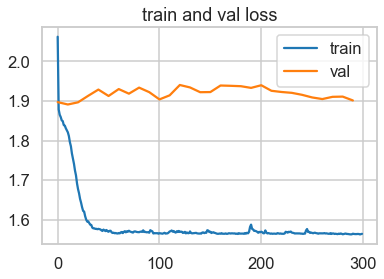

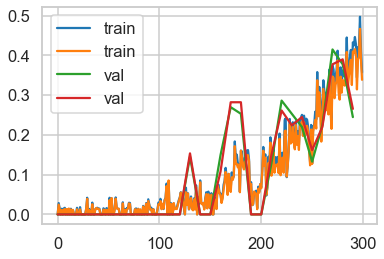

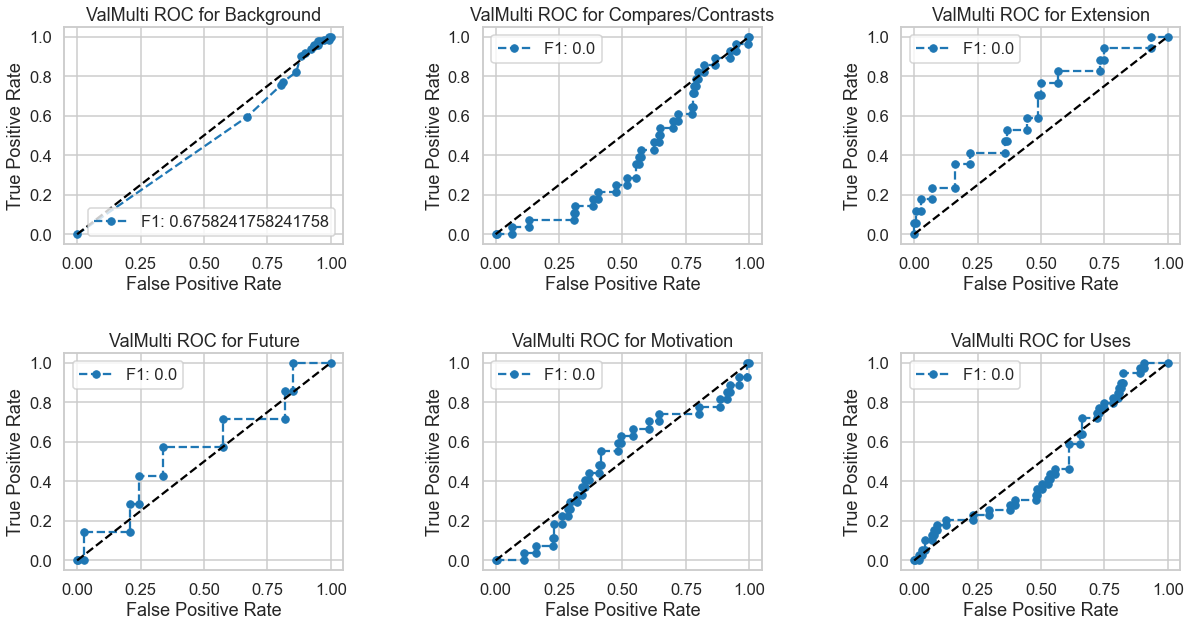

Val Loss: 1.862323


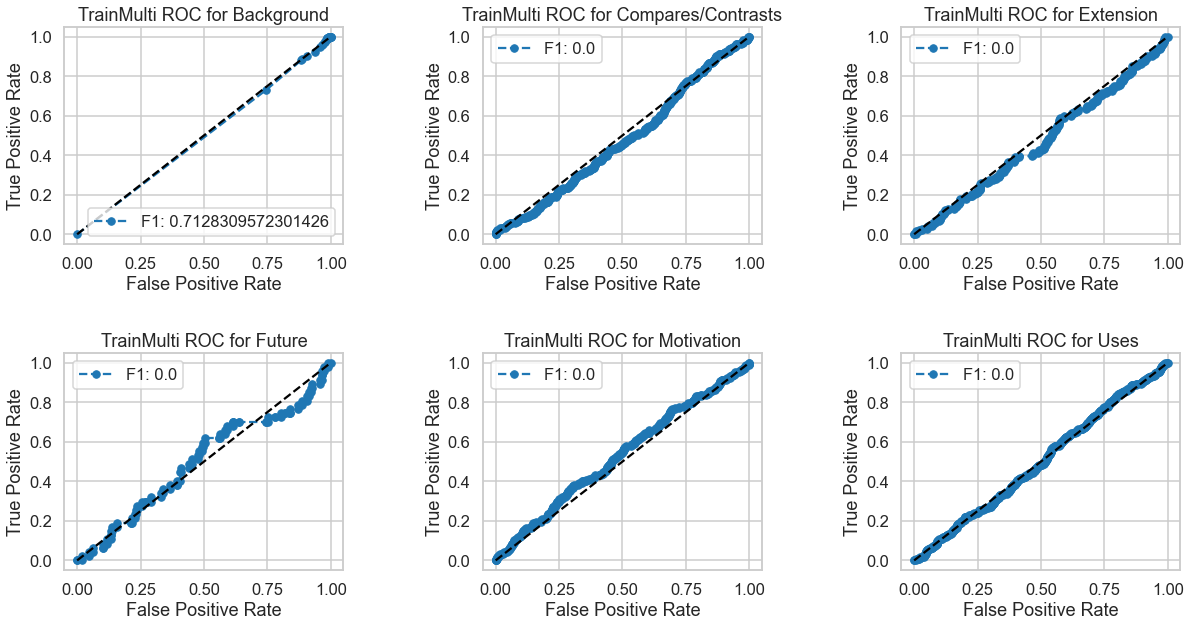

 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.23it/s]

GPU Enabled Beep Boop


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.77it/s]

Epoch: 1/300... Loss: 1.886804...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 30.00it/s]

Epoch: 2/300... Loss: 1.763078...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 3/300... Loss: 1.905593...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 4/300... Loss: 1.799014...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 5/300... Loss: 1.790769...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 6/300... Loss: 1.832000...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 7/300... Loss: 1.881558...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 8/300... Loss: 1.802230...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.72it/s]

Epoch: 9/300... Loss: 1.894965...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.08it/s]

Epoch: 10/300... Loss: 1.837715...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 11/300... Loss: 1.765428...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 12/300... Loss: 1.818102...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 13/300... Loss: 1.833731...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 14/300... Loss: 1.817124...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 15/300... Loss: 1.767799...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 16/300... Loss: 1.829176...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 17/300... Loss: 1.762584...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 18/300... Loss: 1.838026...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 19/300... Loss: 1.902981...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.89it/s]

Epoch: 20/300... Loss: 1.791091...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 21/300... Loss: 1.708268...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 22/300... Loss: 1.726957...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 23/300... Loss: 1.761204...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 24/300... Loss: 1.709259...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.78it/s]

Epoch: 25/300... Loss: 1.750657...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 26/300... Loss: 1.771486...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.25it/s]

Epoch: 27/300... Loss: 1.664205...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 28/300... Loss: 1.585476...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 29/300... Loss: 1.662917...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.55it/s]

Epoch: 30/300... Loss: 1.601110...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 31/300... Loss: 1.682136...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 32/300... Loss: 1.707996...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 33/300... Loss: 1.667722...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 34/300... Loss: 1.679936...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 35/300... Loss: 1.783700...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 36/300... Loss: 1.738439...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 37/300... Loss: 1.669638...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 38/300... Loss: 1.654124...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 39/300... Loss: 1.617044...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 40/300... Loss: 1.672522...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 41/300... Loss: 1.831521...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 42/300... Loss: 1.611132...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 43/300... Loss: 1.749996...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 44/300... Loss: 1.512091...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 45/300... Loss: 1.594032...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 46/300... Loss: 1.563949...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 47/300... Loss: 1.500539...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 48/300... Loss: 1.636141...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 49/300... Loss: 1.516256...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 50/300... Loss: 1.557149...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 51/300... Loss: 1.638196...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 52/300... Loss: 1.648335...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 53/300... Loss: 1.636123...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 54/300... Loss: 1.629833...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 55/300... Loss: 1.600217...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 56/300... Loss: 1.619460...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 57/300... Loss: 1.570013...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 58/300... Loss: 1.577279...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 59/300... Loss: 1.651748...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 28.93it/s]

Epoch: 60/300... Loss: 1.560658...


 15%|████████████▍                                                                      | 6/40 [00:00<00:01, 29.21it/s]

Epoch: 61/300... Loss: 1.516671...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 62/300... Loss: 1.578800...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 63/300... Loss: 1.487527...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 64/300... Loss: 1.549897...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 65/300... Loss: 1.476924...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 66/300... Loss: 1.504569...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 67/300... Loss: 1.617802...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 68/300... Loss: 1.508212...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 69/300... Loss: 1.484458...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 70/300... Loss: 1.490004...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.78it/s]

Epoch: 71/300... Loss: 1.517125...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 72/300... Loss: 1.555077...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 73/300... Loss: 1.531633...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 74/300... Loss: 1.507797...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 75/300... Loss: 1.566063...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 76/300... Loss: 1.494148...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 77/300... Loss: 1.540826...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 78/300... Loss: 1.556986...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 79/300... Loss: 1.508779...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 80/300... Loss: 1.605252...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.78it/s]

Epoch: 81/300... Loss: 1.492588...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 82/300... Loss: 1.571648...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.63it/s]

Epoch: 83/300... Loss: 1.465714...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 84/300... Loss: 1.461599...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 85/300... Loss: 1.568234...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 86/300... Loss: 1.484675...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.71it/s]

Epoch: 87/300... Loss: 1.531642...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 88/300... Loss: 1.537492...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 89/300... Loss: 1.548151...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 90/300... Loss: 1.620908...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.74it/s]

Epoch: 91/300... Loss: 1.520986...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 92/300... Loss: 1.455371...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.78it/s]

Epoch: 93/300... Loss: 1.540398...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 94/300... Loss: 1.521173...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 95/300... Loss: 1.569736...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.04it/s]

Epoch: 96/300... Loss: 1.562435...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 97/300... Loss: 1.502648...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 98/300... Loss: 1.518916...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 99/300... Loss: 1.539178...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 100/300... Loss: 1.584208...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.36it/s]

Epoch: 101/300... Loss: 1.532156...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 102/300... Loss: 1.513990...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 103/300... Loss: 1.597267...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 104/300... Loss: 1.451509...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 105/300... Loss: 1.585640...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 106/300... Loss: 1.507482...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.71it/s]

Epoch: 107/300... Loss: 1.587207...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 108/300... Loss: 1.555113...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 109/300... Loss: 1.531932...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 110/300... Loss: 1.580173...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.04it/s]

Epoch: 111/300... Loss: 1.473705...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 112/300... Loss: 1.463429...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 113/300... Loss: 1.632126...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 114/300... Loss: 1.521300...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 115/300... Loss: 1.607206...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.72it/s]

Epoch: 116/300... Loss: 1.464184...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 117/300... Loss: 1.506855...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 118/300... Loss: 1.504535...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 119/300... Loss: 1.606134...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 120/300... Loss: 1.530287...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 121/300... Loss: 1.462106...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 122/300... Loss: 1.544677...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.36it/s]

Epoch: 123/300... Loss: 1.558200...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 124/300... Loss: 1.498799...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 125/300... Loss: 1.452773...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 126/300... Loss: 1.540784...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 127/300... Loss: 1.501726...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 128/300... Loss: 1.501219...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 129/300... Loss: 1.579204...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 130/300... Loss: 1.448255...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 131/300... Loss: 1.477492...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.85it/s]

Epoch: 132/300... Loss: 1.514068...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 133/300... Loss: 1.437951...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 134/300... Loss: 1.521920...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.63it/s]

Epoch: 135/300... Loss: 1.506708...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 136/300... Loss: 1.550835...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.85it/s]

Epoch: 137/300... Loss: 1.561998...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 138/300... Loss: 1.637520...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 139/300... Loss: 1.606202...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 140/300... Loss: 1.513101...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 141/300... Loss: 1.548165...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 142/300... Loss: 1.481037...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 143/300... Loss: 1.604744...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 144/300... Loss: 1.509276...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 145/300... Loss: 1.570272...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.25it/s]

Epoch: 146/300... Loss: 1.509635...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 147/300... Loss: 1.473272...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 148/300... Loss: 1.506575...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 149/300... Loss: 1.501873...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.70it/s]

Epoch: 150/300... Loss: 1.515435...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.99it/s]

Epoch: 151/300... Loss: 1.565829...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 152/300... Loss: 1.480292...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 153/300... Loss: 1.536560...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 154/300... Loss: 1.472149...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 155/300... Loss: 1.514748...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 156/300... Loss: 1.625736...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 157/300... Loss: 1.449354...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 158/300... Loss: 1.540118...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 159/300... Loss: 1.579164...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 160/300... Loss: 1.558565...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 161/300... Loss: 1.553765...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 162/300... Loss: 1.481342...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 163/300... Loss: 1.523701...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 164/300... Loss: 1.614360...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 165/300... Loss: 1.568618...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 166/300... Loss: 1.559269...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 167/300... Loss: 1.469641...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 168/300... Loss: 1.605359...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 169/300... Loss: 1.500543...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 170/300... Loss: 1.581488...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.39it/s]

Epoch: 171/300... Loss: 1.535427...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 172/300... Loss: 1.660142...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.79it/s]

Epoch: 173/300... Loss: 1.457692...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 174/300... Loss: 1.527477...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 175/300... Loss: 1.531604...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 176/300... Loss: 1.518223...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 177/300... Loss: 1.520657...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 178/300... Loss: 1.493015...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 30.00it/s]

Epoch: 179/300... Loss: 1.476622...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 180/300... Loss: 1.654438...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 181/300... Loss: 1.674303...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 182/300... Loss: 1.513740...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.25it/s]

Epoch: 183/300... Loss: 1.466431...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 184/300... Loss: 1.510185...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 185/300... Loss: 1.523543...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 186/300... Loss: 1.570229...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 187/300... Loss: 1.500419...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.71it/s]

Epoch: 188/300... Loss: 1.560025...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 189/300... Loss: 1.554495...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.27it/s]

Epoch: 190/300... Loss: 1.480349...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 191/300... Loss: 1.422598...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 192/300... Loss: 1.631075...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 193/300... Loss: 1.459891...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.54it/s]

Epoch: 194/300... Loss: 1.541289...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 38.10it/s]

Epoch: 195/300... Loss: 1.576206...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.38it/s]

Epoch: 196/300... Loss: 1.484515...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 197/300... Loss: 1.500154...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 198/300... Loss: 1.535133...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.79it/s]

Epoch: 199/300... Loss: 1.556380...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.64it/s]

Epoch: 200/300... Loss: 1.486830...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 201/300... Loss: 1.522774...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 202/300... Loss: 1.584961...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 203/300... Loss: 1.527676...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 204/300... Loss: 1.527161...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 205/300... Loss: 1.463241...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 206/300... Loss: 1.537058...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 207/300... Loss: 1.557754...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 208/300... Loss: 1.500896...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.04it/s]

Epoch: 209/300... Loss: 1.472507...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 210/300... Loss: 1.541119...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 211/300... Loss: 1.657813...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 212/300... Loss: 1.539249...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.78it/s]

Epoch: 213/300... Loss: 1.427100...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 214/300... Loss: 1.536838...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 215/300... Loss: 1.523590...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 216/300... Loss: 1.739269...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 217/300... Loss: 1.485035...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 218/300... Loss: 1.467814...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 219/300... Loss: 1.519644...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 37.04it/s]

Epoch: 220/300... Loss: 1.442782...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.36it/s]

Epoch: 221/300... Loss: 1.422637...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 222/300... Loss: 1.515255...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 223/300... Loss: 1.501508...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.75it/s]

Epoch: 224/300... Loss: 1.482402...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 225/300... Loss: 1.529341...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 226/300... Loss: 1.567141...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 227/300... Loss: 1.528011...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 228/300... Loss: 1.577191...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 28.78it/s]

Epoch: 229/300... Loss: 1.428397...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 230/300... Loss: 1.511420...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 39.61it/s]

Epoch: 231/300... Loss: 1.468877...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.33it/s]

Epoch: 232/300... Loss: 1.594062...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.30it/s]

Epoch: 233/300... Loss: 1.511012...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 234/300... Loss: 1.483517...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.52it/s]

Epoch: 235/300... Loss: 1.480818...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 25.86it/s]

Epoch: 236/300... Loss: 1.505609...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 237/300... Loss: 1.568836...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 238/300... Loss: 1.513370...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.77it/s]

Epoch: 239/300... Loss: 1.516189...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 240/300... Loss: 1.518994...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 241/300... Loss: 1.535066...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 242/300... Loss: 1.550814...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.90it/s]

Epoch: 243/300... Loss: 1.544599...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 244/300... Loss: 1.550770...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 245/300... Loss: 1.400656...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.40it/s]

Epoch: 246/300... Loss: 1.463352...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.07it/s]

Epoch: 247/300... Loss: 1.466732...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 248/300... Loss: 1.543778...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 249/300... Loss: 1.499959...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.19it/s]

Epoch: 250/300... Loss: 1.541203...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 30.00it/s]

Epoch: 251/300... Loss: 1.566140...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 252/300... Loss: 1.409088...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.54it/s]

Epoch: 253/300... Loss: 1.489548...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 254/300... Loss: 1.473856...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 255/300... Loss: 1.597207...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 256/300... Loss: 1.523460...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 257/300... Loss: 1.496811...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.63it/s]

Epoch: 258/300... Loss: 1.435570...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 259/300... Loss: 1.501741...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 260/300... Loss: 1.519310...


 10%|████████▎                                                                          | 4/40 [00:00<00:00, 36.04it/s]

Epoch: 261/300... Loss: 1.524222...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 34.48it/s]

Epoch: 262/300... Loss: 1.491456...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 263/300... Loss: 1.517967...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.01it/s]

Epoch: 264/300... Loss: 1.481277...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 265/300... Loss: 1.520716...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 266/300... Loss: 1.439547...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 26.32it/s]

Epoch: 267/300... Loss: 1.497547...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 268/300... Loss: 1.460859...


  5%|████▏                                                                              | 2/40 [00:00<00:02, 18.69it/s]

Epoch: 269/300... Loss: 1.439707...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.59it/s]

Epoch: 270/300... Loss: 1.493938...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 271/300... Loss: 1.476137...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.08it/s]

Epoch: 272/300... Loss: 1.486520...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.58it/s]

Epoch: 273/300... Loss: 1.461673...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.03it/s]

Epoch: 274/300... Loss: 1.563353...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.50it/s]

Epoch: 275/300... Loss: 1.510615...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 276/300... Loss: 1.502643...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.70it/s]

Epoch: 277/300... Loss: 1.520651...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.08it/s]

Epoch: 278/300... Loss: 1.518991...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 23.81it/s]

Epoch: 279/300... Loss: 1.474820...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 29.85it/s]

Epoch: 280/300... Loss: 1.521884...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 281/300... Loss: 1.448128...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.53it/s]

Epoch: 282/300... Loss: 1.464925...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.79it/s]

Epoch: 283/300... Loss: 1.585988...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 24.00it/s]

Epoch: 284/300... Loss: 1.453656...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.00it/s]

Epoch: 285/300... Loss: 1.466744...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 30.30it/s]

Epoch: 286/300... Loss: 1.606450...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.06it/s]

Epoch: 287/300... Loss: 1.486669...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 288/300... Loss: 1.550371...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.09it/s]

Epoch: 289/300... Loss: 1.447662...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.52it/s]

Epoch: 290/300... Loss: 1.449080...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 35.71it/s]

Epoch: 291/300... Loss: 1.466042...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 32.26it/s]

Epoch: 292/300... Loss: 1.483732...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 33.61it/s]

Epoch: 293/300... Loss: 1.489686...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 27.78it/s]

Epoch: 294/300... Loss: 1.532132...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 295/300... Loss: 1.493319...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.41it/s]

Epoch: 296/300... Loss: 1.489488...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 29.13it/s]

Epoch: 297/300... Loss: 1.492485...


  8%|██████▏                                                                            | 3/40 [00:00<00:01, 28.57it/s]

Epoch: 298/300... Loss: 1.514815...


 10%|████████▎                                                                          | 4/40 [00:00<00:01, 31.49it/s]

Epoch: 299/300... Loss: 1.479484...


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 34.01it/s]


Epoch: 300/300... Loss: 1.494825...
Val Loss: 2.298536


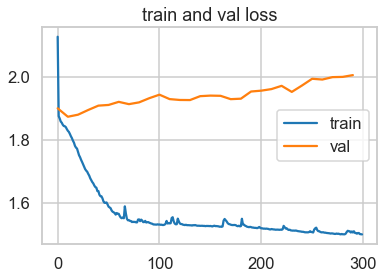

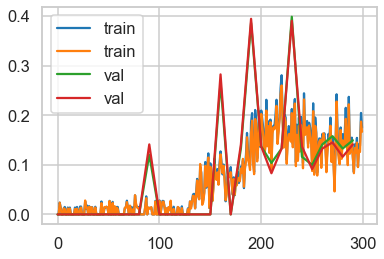

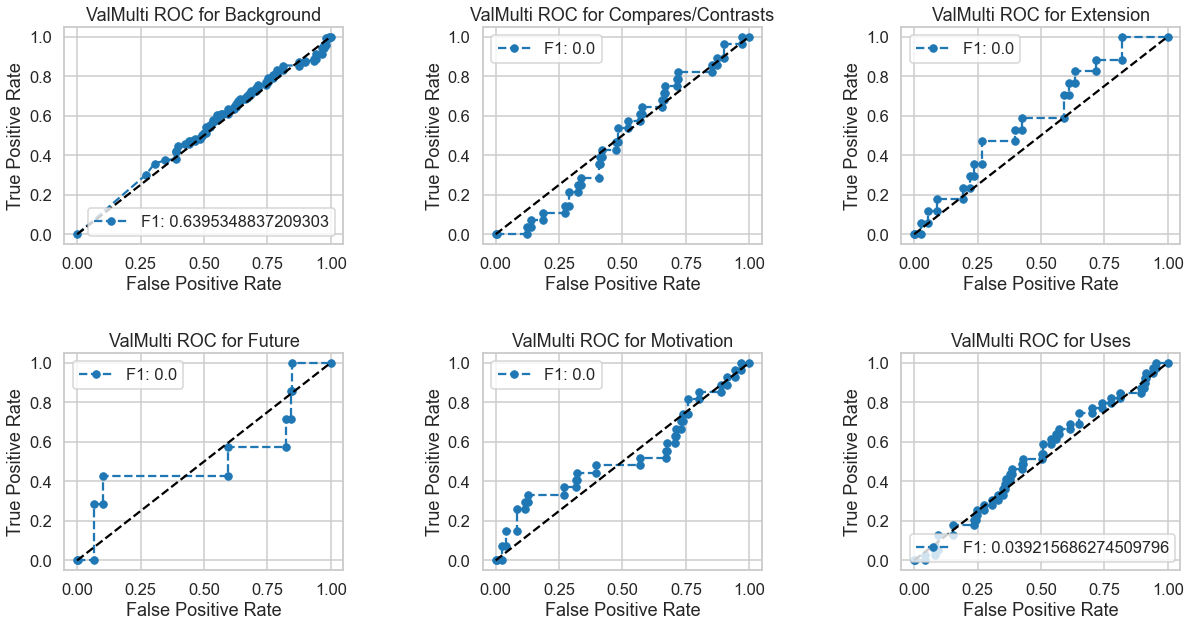

Val Loss: 1.739686


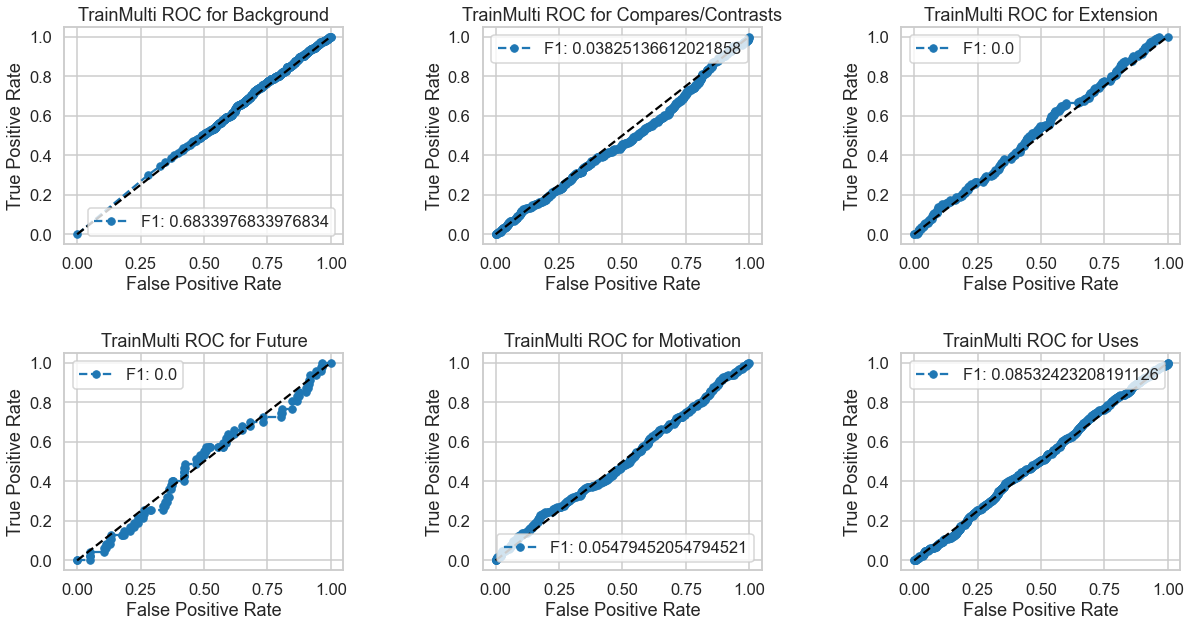

In [5]:
for arguments in hyperparams:
    net = citationLSTM(arguments)
    train_network(net, train, val, arguments)
    y_pred_val = evaluate_network(net, val, arguments)
    y_test_val_multi = np.stack(val["citation_class_label"].values, axis=0)
    y_test_val_bi = np.stack(val["citation_influence_label"].values, axis=0)
    y_pred_val_multi = y_pred_val[:, 0:6]
    y_pred_val_bi = y_pred_val[:, 6:8]

    multiclass_metrics(y_test_val_multi, y_pred_val_multi, paramdict=arguments, title="ValMulti", output_text=True, filepath="../outputs")
#     binary_metrics(y_test_val_bi, y_pred_val_bi, paramdict=arguments, title="ValBi",output_text=True, filepath="../outputs")
    
    y_pred_train = evaluate_network(net, train, arguments)
    y_test_train_multi = np.stack(train["citation_class_label"].values, axis=0)
    y_test_train_bi = np.stack(train["citation_influence_label"].values, axis=0)
    y_pred_train_multi = y_pred_train[:, 0:6]
    y_pred_train_bi = y_pred_train[:, 7]
    multiclass_metrics(y_test_train_multi, y_pred_train_multi, paramdict=arguments, title="TrainMulti", output_text=True, filepath="../outputs")
#     binary_metrics(y_test_train_bi, y_pred_train_bi, paramdict=arguments, title="TrainBi",output_text=True, filepath="../outputs")

#     print(y_pred_multi.shape)
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     f1s = []
#     for i in range(6):
#         tests = np.array(y_test[:len(y_pred_multi)] == i, dtype="int")
#         scores = [y_pred_multi[j][i] for j in range(len(y_pred_multi))]
#         preds = np.array([np.argmax(y_pred_multi[j]) == i for j in range(len(y_pred_multi))], dtype="int")
#         fpr[i], tpr[i], thresholds = roc_curve(tests, scores)
#         roc_auc[i] = auc(fpr[i], tpr[i])
#         f1s.append(f1_score(tests, preds))
#     f = open("../../parametertuning.txt","a")
#     print(f1s, file=f)
#     print(roc_auc, file=f)
# f.close()

Test network and generate predictions on validation set.

Some simple ROC and F1 score calculations. Done for both multi and binary cases.

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

y_pred_multi = y_pred[:, 0:6]
print(y_pred_multi.shape)
fpr = dict()
tpr = dict()
roc_auc = dict()
f1s = []
for i in range(6):
    tests = np.array(y_test[:len(y_pred_multi)] == i, dtype="int")
    scores = [y_pred_multi[j][i] for j in range(len(y_pred_multi))]
    preds = np.array([np.argmax(y_pred_multi[j]) == i for j in range(len(y_pred_multi))], dtype="int")
    fpr[i], tpr[i], thresholds = roc_curve(tests, scores)
    roc_auc[i] = auc(fpr[i], tpr[i])
    f1s.append(f1_score(tests, preds))

NameError: name 'y_pred' is not defined

In [ ]:
for i in range(6):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for Class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()
    print("F1 Score: {}".format(f1s[i]))

In [ ]:
y_test = np.stack(val["citation_influence_label"].values, axis=0) 
y_pred_bi = y_pred[:, 6:8]

fpr = dict()
tpr = dict()
roc_auc = dict()
f1s = []
for i in range(2):
    tests = np.array(y_test[:len(y_pred_bi)] == i, dtype="int")
    scores = [y_pred_bi[j][i] for j in range(len(y_pred_bi))]
    preds = np.array([np.argmax(y_pred_bi[j]) == i for j in range(len(y_pred_bi))], dtype="int")
#     print(tests, scores)
    fpr[i], tpr[i], thresholds = roc_curve(tests, scores)
    roc_auc[i] = auc(fpr[i], tpr[i])
    f1s.append(f1_score(tests, preds))

In [ ]:
for i in range(2):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for Class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()
    print("F1 Score: {}".format(f1s[i]))